In [10]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\NB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
0                  0.0        1              2                   113.750000   
1                  0.0        1              4                   154.733333   
2                  0.0        2              4                    71.666667   
3                  0.0        3              4                   191.000000   
4                  0.0        4              2                   174.333333   
...                ...      ...            ...                          ...   
2372             199.0        4              3                    87.000000   
2373             200.0        1              3                    70.800000   
2374             200.0        2              3                    90.000000   
2375             200.0        3              1                    71.500000   
2376             200.0        4              3                    99.000000   

      LightingCostAveragePerDwelling  HeatingCostAv

In [11]:
dataset.dtypes

AverageFloorArea                  float64
Quarter                             int64
Property Type                       int64
EnergyUseAveragePerDwelling       float64
LightingCostAveragePerDwelling    float64
HeatingCostAveragePerDwelling     float64
HotWaterCostAveragePerDwelling    float64
dtype: object

In [12]:
del dataset['LightingCostAveragePerDwelling']
del dataset['HeatingCostAveragePerDwelling']

In [13]:
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,HotWaterCostAveragePerDwelling
0,0.0,1,2,113.750000,118.500000
1,0.0,1,4,154.733333,115.533333
2,0.0,2,4,71.666667,57.333333
3,0.0,3,4,191.000000,140.000000
4,0.0,4,2,174.333333,76.000000
...,...,...,...,...,...
2372,199.0,4,3,87.000000,123.333333
2373,200.0,1,3,70.800000,113.800000
2374,200.0,2,3,90.000000,137.000000
2375,200.0,3,1,71.500000,126.500000


In [14]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['HotWaterCostAveragePerDwelling'] = dataset['HotWaterCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,HotWaterCostAveragePerDwelling
0,0,1,2,113,118
1,0,1,4,154,115
2,0,2,4,71,57
3,0,3,4,191,140
4,0,4,2,174,76
...,...,...,...,...,...
2372,199,4,3,87,123
2373,200,1,3,70,113
2374,200,2,3,90,137
2375,200,3,1,71,126


In [15]:
from sklearn.model_selection import train_test_split
X=dataset.drop('HotWaterCostAveragePerDwelling',axis=1)
Y=dataset['HotWaterCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling
2323,192,3,3,89
2138,169,4,3,81
2017,157,2,1,91
227,29,4,2,160
1864,142,3,1,107
...,...,...,...,...
1033,84,2,3,98
1731,131,4,1,105
763,67,2,3,122
835,71,4,4,115


## Naive bias

In [16]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [17]:
prediction = NB_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [138]


In [18]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

-2.0434714270212964

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 1484.1148459383753
mean absolute error: 30.677871148459385


Text(0.5, 1.0, 'Actual vs predicted')

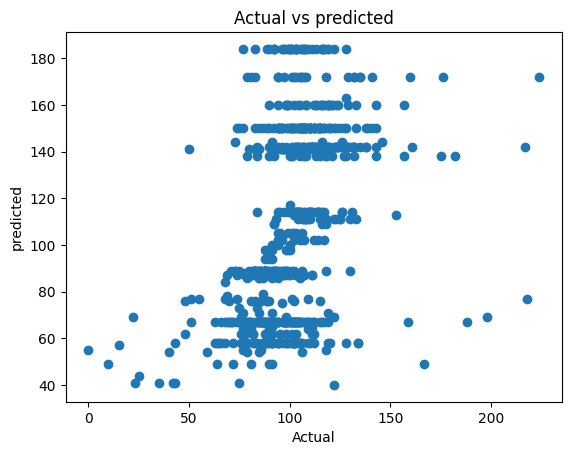

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [21]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,87,67,20
182,65,58,7
565,103,87,16
457,69,78,-9
1852,104,67,37
568,78,87,-9
1340,115,138,-23
778,85,89,-4
562,104,58,46
716,95,58,37


## linear regression

In [22]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [23]:
prediction = lr_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [100.1724084]


In [24]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.288145434422701

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 347.1279275180426
mean absolute error: 12.1839244597228


Text(0.5, 1.0, 'Actual vs predicted')

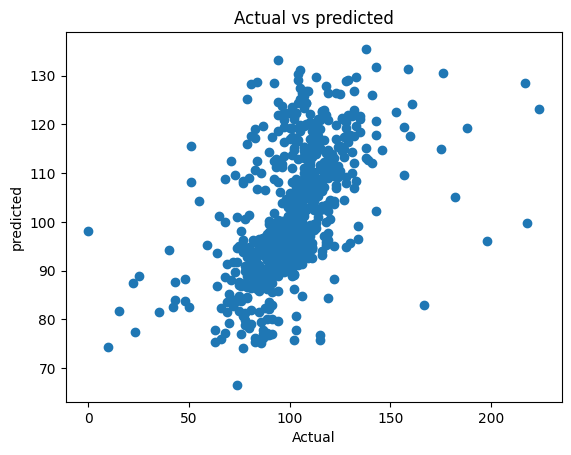

In [26]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [27]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,87,89.100478,-2.100478
182,65,101.151180,-36.151180
565,103,93.105406,9.894594
457,69,83.513001,-14.513001
1852,104,112.824552,-8.824552
568,78,94.728897,-16.728897
1340,115,115.099531,-0.099531
778,85,87.714900,-2.714900
562,104,93.943226,10.056774
716,95,92.611765,2.388235


## Random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,1,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [109.805]


In [46]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.36243111748112133

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 310.903343942577
mean absolute error: 10.455315126050419


Text(0.5, 1.0, 'Actual vs predicted')

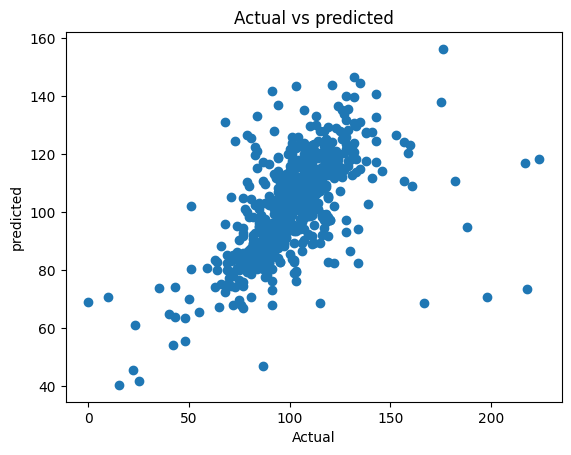

In [48]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [49]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,87,90.785,-3.785
182,65,67.265,-2.265
565,103,102.665,0.335
457,69,82.315,-13.315
1852,104,94.140,9.860
568,78,83.325,-5.325
1340,115,120.440,-5.440
778,85,81.970,3.030
562,104,102.580,1.420
716,95,82.665,12.335


## KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [100.76666667]


In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.3395925826605307

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 322.04030034235916
mean absolute error: 11.566526610644258


Text(0.5, 1.0, 'Actual vs predicted')

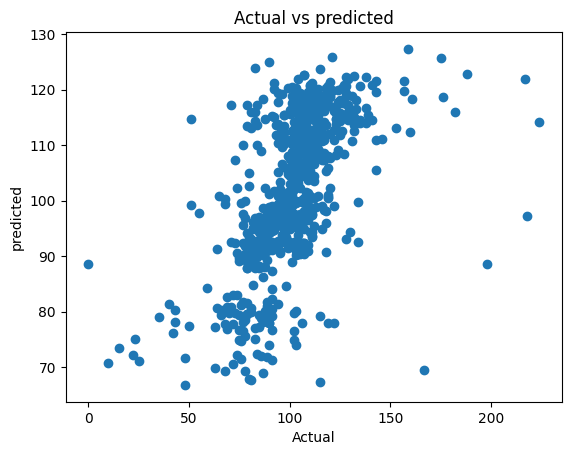

In [53]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [54]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,87,98.633333,-11.633333
182,65,100.866667,-35.866667
565,103,90.133333,12.866667
457,69,80.800000,-11.800000
1852,104,108.700000,-4.700000
568,78,90.366667,-12.366667
1340,115,123.833333,-8.833333
778,85,94.433333,-9.433333
562,104,91.733333,12.266667
716,95,90.566667,4.433333


## CNN

In [55]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             128       
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 16)            0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                2

In [56]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 5s 39ms/step - loss: 2466.7898 - mae: 38.7465 - val_loss: 413.7388 - val_mae: 14.9018
Epoch 2/2000
37/37 [==============================] - 0s 9ms/step - loss: 460.6866 - mae: 16.2665 - val_loss: 430.1853 - val_mae: 15.3882
Epoch 3/2000
37/37 [==============================] - 0s 7ms/step - loss: 436.2863 - mae: 15.6677 - val_loss: 490.4344 - val_mae: 16.9646
Epoch 4/2000
37/37 [==============================] - 0s 8ms/step - loss: 401.6469 - mae: 14.6394 - val_loss: 403.9928 - val_mae: 14.6032
Epoch 5/2000
37/37 [==============================] - 0s 9ms/step - loss: 376.9345 - mae: 14.0344 - val_loss: 481.5836 - val_mae: 16.7675
Epoch 6/2000
37/37 [==============================] - 0s 9ms/step - loss: 360.4821 - mae: 14.0455 - val_loss: 447.8831 - val_mae: 15.9342
Epoch 7/2000
37/37 [==============================] - 0s 9ms/step - loss: 346.7725 - mae: 13.6741 - val_loss: 462.1840 - val_mae: 16.2925
Epoch 8/2000
37/37 [============

Epoch 60/2000
37/37 [==============================] - 0s 8ms/step - loss: 290.8043 - mae: 12.1846 - val_loss: 461.9317 - val_mae: 15.8512
Epoch 61/2000
37/37 [==============================] - 0s 8ms/step - loss: 290.2635 - mae: 12.1360 - val_loss: 512.1833 - val_mae: 17.2380
Epoch 62/2000
37/37 [==============================] - 0s 8ms/step - loss: 297.1320 - mae: 12.3398 - val_loss: 423.7848 - val_mae: 14.9062
Epoch 63/2000
37/37 [==============================] - 0s 8ms/step - loss: 298.1514 - mae: 12.3726 - val_loss: 526.1069 - val_mae: 17.5814
Epoch 64/2000
37/37 [==============================] - 0s 8ms/step - loss: 280.6249 - mae: 11.9629 - val_loss: 459.5134 - val_mae: 15.8205
Epoch 65/2000
37/37 [==============================] - 0s 8ms/step - loss: 278.9402 - mae: 11.8112 - val_loss: 443.5380 - val_mae: 15.4256
Epoch 66/2000
37/37 [==============================] - 0s 7ms/step - loss: 287.5453 - mae: 12.0402 - val_loss: 398.7162 - val_mae: 14.1520
Epoch 67/2000
37/37 [======

Epoch 119/2000
37/37 [==============================] - 0s 10ms/step - loss: 282.1289 - mae: 11.9337 - val_loss: 519.5134 - val_mae: 17.4695
Epoch 120/2000
37/37 [==============================] - 0s 9ms/step - loss: 281.0482 - mae: 11.8566 - val_loss: 442.8289 - val_mae: 15.4456
Epoch 121/2000
37/37 [==============================] - 0s 10ms/step - loss: 281.7683 - mae: 11.8289 - val_loss: 439.4797 - val_mae: 15.3370
Epoch 122/2000
37/37 [==============================] - 0s 8ms/step - loss: 287.1980 - mae: 11.9708 - val_loss: 495.7224 - val_mae: 16.7666
Epoch 123/2000
37/37 [==============================] - 0s 8ms/step - loss: 284.5121 - mae: 11.9737 - val_loss: 385.0368 - val_mae: 13.7226
Epoch 124/2000
37/37 [==============================] - 0s 8ms/step - loss: 278.0453 - mae: 11.8405 - val_loss: 438.2015 - val_mae: 15.2275
Epoch 125/2000
37/37 [==============================] - 0s 9ms/step - loss: 278.8860 - mae: 11.8259 - val_loss: 442.3308 - val_mae: 15.3778
Epoch 126/2000
37/

37/37 [==============================] - 0s 9ms/step - loss: 287.2396 - mae: 11.8396 - val_loss: 423.4666 - val_mae: 15.0532
Epoch 236/2000
37/37 [==============================] - 0s 10ms/step - loss: 281.9930 - mae: 11.7606 - val_loss: 459.1389 - val_mae: 16.0396
Epoch 237/2000
37/37 [==============================] - 0s 10ms/step - loss: 290.3211 - mae: 11.9254 - val_loss: 389.5352 - val_mae: 14.0505
Epoch 238/2000
37/37 [==============================] - 0s 7ms/step - loss: 276.3160 - mae: 11.6263 - val_loss: 415.8932 - val_mae: 14.8194
Epoch 239/2000
37/37 [==============================] - 0s 6ms/step - loss: 282.0494 - mae: 11.7741 - val_loss: 395.2788 - val_mae: 14.2292
Epoch 240/2000
37/37 [==============================] - 0s 7ms/step - loss: 279.5525 - mae: 11.7132 - val_loss: 407.6371 - val_mae: 14.5158
Epoch 241/2000
37/37 [==============================] - 0s 7ms/step - loss: 275.4293 - mae: 11.5908 - val_loss: 415.2447 - val_mae: 14.7729
Epoch 242/2000
37/37 [===========

37/37 [==============================] - 0s 8ms/step - loss: 272.0907 - mae: 11.4533 - val_loss: 422.1870 - val_mae: 15.1700
Epoch 352/2000
37/37 [==============================] - 0s 9ms/step - loss: 274.0466 - mae: 11.5340 - val_loss: 468.9916 - val_mae: 16.4262
Epoch 353/2000
37/37 [==============================] - 0s 8ms/step - loss: 277.6898 - mae: 11.7377 - val_loss: 474.4630 - val_mae: 16.5465
Epoch 354/2000
37/37 [==============================] - 0s 7ms/step - loss: 275.5485 - mae: 11.6185 - val_loss: 450.1831 - val_mae: 15.9141
Epoch 355/2000
37/37 [==============================] - 0s 8ms/step - loss: 274.9776 - mae: 11.7075 - val_loss: 434.3623 - val_mae: 15.4741
Epoch 356/2000
37/37 [==============================] - 0s 9ms/step - loss: 280.8544 - mae: 11.7958 - val_loss: 408.9731 - val_mae: 14.7528
Epoch 357/2000
37/37 [==============================] - 0s 8ms/step - loss: 274.9590 - mae: 11.5521 - val_loss: 510.9387 - val_mae: 17.4352
Epoch 358/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 268.1302 - mae: 11.4246 - val_loss: 403.3598 - val_mae: 14.6975
Epoch 468/2000
37/37 [==============================] - 0s 7ms/step - loss: 262.9401 - mae: 11.3255 - val_loss: 448.5916 - val_mae: 15.8547
Epoch 469/2000
37/37 [==============================] - 0s 8ms/step - loss: 262.1999 - mae: 11.2737 - val_loss: 408.6238 - val_mae: 14.7541
Epoch 470/2000
37/37 [==============================] - 0s 8ms/step - loss: 265.7655 - mae: 11.4919 - val_loss: 478.4917 - val_mae: 16.5570
Epoch 471/2000
37/37 [==============================] - 0s 9ms/step - loss: 264.4039 - mae: 11.3168 - val_loss: 399.0417 - val_mae: 14.5699
Epoch 472/2000
37/37 [==============================] - 0s 7ms/step - loss: 270.2968 - mae: 11.6548 - val_loss: 414.5509 - val_mae: 14.9292
Epoch 473/2000
37/37 [==============================] - 0s 8ms/step - loss: 265.1786 - mae: 11.4133 - val_loss: 421.3578 - val_mae: 15.0889
Epoch 474/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 262.8092 - mae: 11.2566 - val_loss: 585.4486 - val_mae: 19.6929
Epoch 584/2000
37/37 [==============================] - 0s 8ms/step - loss: 255.8251 - mae: 11.1038 - val_loss: 459.4501 - val_mae: 16.5195
Epoch 585/2000
37/37 [==============================] - 0s 8ms/step - loss: 253.1283 - mae: 11.1061 - val_loss: 420.5712 - val_mae: 15.3525
Epoch 586/2000
37/37 [==============================] - 0s 7ms/step - loss: 258.6595 - mae: 11.1219 - val_loss: 430.6788 - val_mae: 15.5253
Epoch 587/2000
37/37 [==============================] - 0s 7ms/step - loss: 254.7684 - mae: 11.1403 - val_loss: 469.1219 - val_mae: 16.5912
Epoch 588/2000
37/37 [==============================] - 0s 8ms/step - loss: 253.0783 - mae: 10.9911 - val_loss: 451.1078 - val_mae: 16.3334
Epoch 589/2000
37/37 [==============================] - 0s 8ms/step - loss: 254.8108 - mae: 11.0721 - val_loss: 374.9933 - val_mae: 13.7723
Epoch 590/2000
37/37 [=============

37/37 [==============================] - 0s 8ms/step - loss: 258.7742 - mae: 11.2728 - val_loss: 350.3094 - val_mae: 13.0100
Epoch 700/2000
37/37 [==============================] - 0s 9ms/step - loss: 255.6614 - mae: 11.1086 - val_loss: 433.2874 - val_mae: 15.5281
Epoch 701/2000
37/37 [==============================] - 0s 8ms/step - loss: 258.4485 - mae: 11.1358 - val_loss: 408.4010 - val_mae: 14.9861
Epoch 702/2000
37/37 [==============================] - 0s 9ms/step - loss: 253.5163 - mae: 11.0244 - val_loss: 478.1070 - val_mae: 16.8250
Epoch 703/2000
37/37 [==============================] - 0s 8ms/step - loss: 257.7454 - mae: 11.2066 - val_loss: 419.6888 - val_mae: 15.0053
Epoch 704/2000
37/37 [==============================] - 0s 8ms/step - loss: 255.4392 - mae: 11.0480 - val_loss: 399.0834 - val_mae: 14.4516
Epoch 705/2000
37/37 [==============================] - 0s 7ms/step - loss: 255.0750 - mae: 11.1121 - val_loss: 366.2460 - val_mae: 13.6704
Epoch 706/2000
37/37 [=============

37/37 [==============================] - 0s 9ms/step - loss: 256.3779 - mae: 11.2197 - val_loss: 446.7753 - val_mae: 15.9265
Epoch 816/2000
37/37 [==============================] - 0s 9ms/step - loss: 250.8884 - mae: 10.9009 - val_loss: 455.8556 - val_mae: 16.2780
Epoch 817/2000
37/37 [==============================] - 0s 9ms/step - loss: 248.4632 - mae: 10.8420 - val_loss: 403.5837 - val_mae: 14.9556
Epoch 818/2000
37/37 [==============================] - 0s 7ms/step - loss: 254.3497 - mae: 10.9502 - val_loss: 409.1791 - val_mae: 14.9114
Epoch 819/2000
37/37 [==============================] - 0s 7ms/step - loss: 254.0165 - mae: 10.8972 - val_loss: 377.6819 - val_mae: 14.0545
Epoch 820/2000
37/37 [==============================] - 0s 8ms/step - loss: 253.9469 - mae: 10.9969 - val_loss: 454.6002 - val_mae: 16.2062
Epoch 821/2000
37/37 [==============================] - 0s 8ms/step - loss: 249.6650 - mae: 10.9629 - val_loss: 449.6447 - val_mae: 16.3634
Epoch 822/2000
37/37 [=============

37/37 [==============================] - 0s 8ms/step - loss: 252.6395 - mae: 11.0847 - val_loss: 459.0513 - val_mae: 16.3853
Epoch 932/2000
37/37 [==============================] - 0s 7ms/step - loss: 254.1204 - mae: 11.0309 - val_loss: 472.4041 - val_mae: 16.7328
Epoch 933/2000
37/37 [==============================] - 0s 8ms/step - loss: 251.7396 - mae: 10.9688 - val_loss: 379.3872 - val_mae: 14.1519
Epoch 934/2000
37/37 [==============================] - 0s 8ms/step - loss: 253.2496 - mae: 11.0272 - val_loss: 392.3161 - val_mae: 14.5295
Epoch 935/2000
37/37 [==============================] - 0s 8ms/step - loss: 247.2233 - mae: 10.8003 - val_loss: 536.2511 - val_mae: 18.4124
Epoch 936/2000
37/37 [==============================] - 0s 8ms/step - loss: 256.2010 - mae: 11.0381 - val_loss: 420.8703 - val_mae: 15.3817
Epoch 937/2000
37/37 [==============================] - 0s 10ms/step - loss: 248.6308 - mae: 10.8844 - val_loss: 549.5006 - val_mae: 18.7097
Epoch 938/2000
37/37 [============

37/37 [==============================] - 0s 6ms/step - loss: 250.8218 - mae: 10.8461 - val_loss: 478.7386 - val_mae: 17.0447
Epoch 1048/2000
37/37 [==============================] - 0s 5ms/step - loss: 254.9254 - mae: 11.0250 - val_loss: 505.5803 - val_mae: 17.6020
Epoch 1049/2000
37/37 [==============================] - 0s 6ms/step - loss: 248.7533 - mae: 10.9672 - val_loss: 418.6537 - val_mae: 15.3973
Epoch 1050/2000
37/37 [==============================] - 0s 6ms/step - loss: 254.2600 - mae: 10.9345 - val_loss: 431.8441 - val_mae: 15.6272
Epoch 1051/2000
37/37 [==============================] - 0s 6ms/step - loss: 251.1866 - mae: 10.9254 - val_loss: 480.3026 - val_mae: 16.7603
Epoch 1052/2000
37/37 [==============================] - 0s 6ms/step - loss: 247.9212 - mae: 10.7990 - val_loss: 516.1942 - val_mae: 18.0138
Epoch 1053/2000
37/37 [==============================] - 0s 6ms/step - loss: 249.3694 - mae: 10.8531 - val_loss: 442.6001 - val_mae: 15.8818
Epoch 1054/2000
37/37 [======

37/37 [==============================] - 0s 4ms/step - loss: 246.1059 - mae: 10.7791 - val_loss: 448.4593 - val_mae: 16.1993
Epoch 1164/2000
37/37 [==============================] - 0s 4ms/step - loss: 247.2339 - mae: 10.7908 - val_loss: 544.9996 - val_mae: 18.6541
Epoch 1165/2000
37/37 [==============================] - 0s 4ms/step - loss: 252.6078 - mae: 10.9272 - val_loss: 465.7012 - val_mae: 16.6573
Epoch 1166/2000
37/37 [==============================] - 0s 4ms/step - loss: 246.8406 - mae: 10.8462 - val_loss: 435.4608 - val_mae: 15.7696
Epoch 1167/2000
37/37 [==============================] - 0s 4ms/step - loss: 249.4859 - mae: 10.8525 - val_loss: 453.0668 - val_mae: 16.3131
Epoch 1168/2000
37/37 [==============================] - 0s 4ms/step - loss: 255.7237 - mae: 11.1071 - val_loss: 509.7815 - val_mae: 17.5577
Epoch 1169/2000
37/37 [==============================] - 0s 4ms/step - loss: 250.2031 - mae: 11.0153 - val_loss: 488.9779 - val_mae: 17.1053
Epoch 1170/2000
37/37 [======

37/37 [==============================] - 0s 5ms/step - loss: 247.7266 - mae: 10.8594 - val_loss: 417.6546 - val_mae: 15.3360
Epoch 1280/2000
37/37 [==============================] - 0s 5ms/step - loss: 247.9895 - mae: 10.7607 - val_loss: 478.4334 - val_mae: 16.9732
Epoch 1281/2000
37/37 [==============================] - 0s 5ms/step - loss: 250.4233 - mae: 10.8328 - val_loss: 448.7019 - val_mae: 16.1691
Epoch 1282/2000
37/37 [==============================] - 0s 4ms/step - loss: 250.4286 - mae: 10.9387 - val_loss: 415.2037 - val_mae: 15.1490
Epoch 1283/2000
37/37 [==============================] - 0s 4ms/step - loss: 249.7576 - mae: 10.8704 - val_loss: 445.5773 - val_mae: 16.0292
Epoch 1284/2000
37/37 [==============================] - 0s 4ms/step - loss: 251.1584 - mae: 10.8763 - val_loss: 438.9094 - val_mae: 15.8988
Epoch 1285/2000
37/37 [==============================] - 0s 5ms/step - loss: 248.0427 - mae: 10.8373 - val_loss: 462.0175 - val_mae: 16.4108
Epoch 1286/2000
37/37 [======

37/37 [==============================] - 0s 5ms/step - loss: 248.9006 - mae: 10.8616 - val_loss: 486.9548 - val_mae: 17.1642
Epoch 1396/2000
37/37 [==============================] - 0s 5ms/step - loss: 248.5290 - mae: 10.7936 - val_loss: 455.1030 - val_mae: 16.3955
Epoch 1397/2000
37/37 [==============================] - 0s 5ms/step - loss: 249.4389 - mae: 10.8584 - val_loss: 470.9264 - val_mae: 16.6743
Epoch 1398/2000
37/37 [==============================] - 0s 5ms/step - loss: 246.3820 - mae: 10.7644 - val_loss: 522.3970 - val_mae: 18.1157
Epoch 1399/2000
37/37 [==============================] - 0s 5ms/step - loss: 249.0763 - mae: 10.8764 - val_loss: 372.8460 - val_mae: 13.9049
Epoch 1400/2000
37/37 [==============================] - 0s 5ms/step - loss: 250.0523 - mae: 10.8678 - val_loss: 420.8889 - val_mae: 15.3579
Epoch 1401/2000
37/37 [==============================] - 0s 5ms/step - loss: 248.0922 - mae: 10.8390 - val_loss: 445.7771 - val_mae: 16.0653
Epoch 1402/2000
37/37 [======

37/37 [==============================] - 0s 5ms/step - loss: 247.8529 - mae: 10.7891 - val_loss: 482.4716 - val_mae: 17.0216
Epoch 1512/2000
37/37 [==============================] - 0s 5ms/step - loss: 246.9179 - mae: 10.7731 - val_loss: 506.8002 - val_mae: 17.6369
Epoch 1513/2000
37/37 [==============================] - 0s 5ms/step - loss: 250.8666 - mae: 10.8647 - val_loss: 398.7628 - val_mae: 14.7092
Epoch 1514/2000
37/37 [==============================] - 0s 5ms/step - loss: 245.5868 - mae: 10.7642 - val_loss: 446.9355 - val_mae: 16.0167
Epoch 1515/2000
37/37 [==============================] - 0s 5ms/step - loss: 248.7526 - mae: 10.8393 - val_loss: 528.4843 - val_mae: 18.2197
Epoch 1516/2000
37/37 [==============================] - 0s 5ms/step - loss: 249.3562 - mae: 10.9134 - val_loss: 471.8449 - val_mae: 16.7317
Epoch 1517/2000
37/37 [==============================] - 0s 5ms/step - loss: 245.3765 - mae: 10.7625 - val_loss: 445.7309 - val_mae: 16.0932
Epoch 1518/2000
37/37 [======

37/37 [==============================] - 0s 5ms/step - loss: 250.2899 - mae: 10.9146 - val_loss: 426.0154 - val_mae: 15.5181
Epoch 1628/2000
37/37 [==============================] - 0s 5ms/step - loss: 251.0051 - mae: 10.8534 - val_loss: 518.8911 - val_mae: 17.9443
Epoch 1629/2000
37/37 [==============================] - 0s 5ms/step - loss: 248.6390 - mae: 10.7939 - val_loss: 423.3136 - val_mae: 15.4574
Epoch 1630/2000
37/37 [==============================] - 0s 5ms/step - loss: 250.4011 - mae: 10.9577 - val_loss: 474.3784 - val_mae: 16.7740
Epoch 1631/2000
37/37 [==============================] - 0s 5ms/step - loss: 247.2324 - mae: 10.7869 - val_loss: 472.9283 - val_mae: 16.8782
Epoch 1632/2000
37/37 [==============================] - 0s 5ms/step - loss: 247.1799 - mae: 10.8206 - val_loss: 457.2799 - val_mae: 16.3832
Epoch 1633/2000
37/37 [==============================] - 0s 5ms/step - loss: 249.4467 - mae: 10.7974 - val_loss: 462.5940 - val_mae: 16.5082
Epoch 1634/2000
37/37 [======

37/37 [==============================] - 0s 4ms/step - loss: 248.8936 - mae: 10.8378 - val_loss: 442.2530 - val_mae: 15.9683
Epoch 1744/2000
37/37 [==============================] - 0s 4ms/step - loss: 249.5779 - mae: 10.9039 - val_loss: 426.7395 - val_mae: 15.5538
Epoch 1745/2000
37/37 [==============================] - 0s 4ms/step - loss: 249.5929 - mae: 10.8724 - val_loss: 445.5468 - val_mae: 15.9716
Epoch 1746/2000
37/37 [==============================] - 0s 5ms/step - loss: 244.5819 - mae: 10.6659 - val_loss: 422.1426 - val_mae: 15.4812
Epoch 1747/2000
37/37 [==============================] - 0s 4ms/step - loss: 250.4949 - mae: 10.9145 - val_loss: 485.2747 - val_mae: 17.1013
Epoch 1748/2000
37/37 [==============================] - 0s 5ms/step - loss: 246.8839 - mae: 10.7843 - val_loss: 415.5698 - val_mae: 15.2801
Epoch 1749/2000
37/37 [==============================] - 0s 5ms/step - loss: 247.7582 - mae: 10.7411 - val_loss: 445.8382 - val_mae: 16.1129
Epoch 1750/2000
37/37 [======

37/37 [==============================] - 0s 4ms/step - loss: 244.9246 - mae: 10.7256 - val_loss: 424.8915 - val_mae: 15.5188
Epoch 1860/2000
37/37 [==============================] - 0s 4ms/step - loss: 248.5307 - mae: 10.8294 - val_loss: 446.4232 - val_mae: 16.1410
Epoch 1861/2000
37/37 [==============================] - 0s 4ms/step - loss: 247.1327 - mae: 10.7578 - val_loss: 463.7364 - val_mae: 16.5580
Epoch 1862/2000
37/37 [==============================] - 0s 4ms/step - loss: 249.7762 - mae: 10.8184 - val_loss: 507.8195 - val_mae: 17.6891
Epoch 1863/2000
37/37 [==============================] - 0s 4ms/step - loss: 247.5140 - mae: 10.8416 - val_loss: 395.1785 - val_mae: 14.5550
Epoch 1864/2000
37/37 [==============================] - 0s 4ms/step - loss: 245.8044 - mae: 10.8005 - val_loss: 442.5907 - val_mae: 16.0435
Epoch 1865/2000
37/37 [==============================] - 0s 4ms/step - loss: 248.8741 - mae: 10.8402 - val_loss: 470.7021 - val_mae: 16.6710
Epoch 1866/2000
37/37 [======

37/37 [==============================] - 0s 5ms/step - loss: 247.1134 - mae: 10.7352 - val_loss: 480.8685 - val_mae: 17.0179
Epoch 1976/2000
37/37 [==============================] - 0s 4ms/step - loss: 248.4281 - mae: 10.9101 - val_loss: 503.3092 - val_mae: 17.4950
Epoch 1977/2000
37/37 [==============================] - 0s 4ms/step - loss: 248.2792 - mae: 10.7728 - val_loss: 414.7963 - val_mae: 15.2237
Epoch 1978/2000
37/37 [==============================] - 0s 4ms/step - loss: 248.6181 - mae: 10.8695 - val_loss: 506.0197 - val_mae: 17.6324
Epoch 1979/2000
37/37 [==============================] - 0s 5ms/step - loss: 246.4481 - mae: 10.7527 - val_loss: 411.0306 - val_mae: 15.0368
Epoch 1980/2000
37/37 [==============================] - 0s 4ms/step - loss: 245.3967 - mae: 10.7236 - val_loss: 455.9205 - val_mae: 16.3338
Epoch 1981/2000
37/37 [==============================] - 0s 4ms/step - loss: 249.3411 - mae: 10.8277 - val_loss: 529.1161 - val_mae: 18.1838
Epoch 1982/2000
37/37 [======

In [57]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

23/23 [==============================] - 0s 2ms/step


-0.0021818946585423493

In [58]:
prediction =np.squeeze(model1.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 155ms/step
Prediction: 90.67398834228516


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 2ms/step
mean squired error: 488.7028066003868
mean absolute error: 16.752777676622408


23/23 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

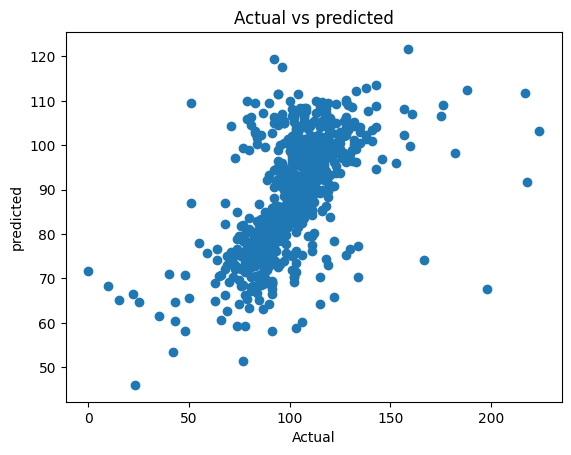

In [60]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [61]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 2ms/step


,Actual,predict,differences
898,87,80.116936,6.883064
182,65,70.605064,-5.605064
565,103,84.458572,18.541428
457,69,72.944122,-3.944122
1852,104,107.791870,-3.791870
568,78,78.423439,-0.423439
1340,115,108.659477,6.340523
778,85,68.681557,16.318443
562,104,82.195808,21.804192
716,95,73.174706,21.825294


## NN with Dense layer

In [62]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=4, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [63]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 9ms/step - loss: 2042.1654 - mae: 33.5401 - val_loss: 423.2352 - val_mae: 14.9344
Epoch 2/2000
37/37 [==============================] - 0s 3ms/step - loss: 353.5887 - mae: 14.0723 - val_loss: 372.1302 - val_mae: 13.2180
Epoch 3/2000
37/37 [==============================] - 0s 4ms/step - loss: 302.2876 - mae: 12.2586 - val_loss: 346.3477 - val_mae: 12.5580
Epoch 4/2000
37/37 [==============================] - 0s 3ms/step - loss: 287.7791 - mae: 11.8745 - val_loss: 339.8589 - val_mae: 12.4528
Epoch 5/2000
37/37 [==============================] - 0s 3ms/step - loss: 283.1306 - mae: 11.7862 - val_loss: 335.1638 - val_mae: 12.2144
Epoch 6/2000
37/37 [==============================] - 0s 3ms/step - loss: 280.6206 - mae: 11.7321 - val_loss: 340.2631 - val_mae: 12.3223
Epoch 7/2000
37/37 [==============================] - 0s 3ms/step - loss: 287.7433 - mae: 11.8594 - val_loss: 344.1540 - val_mae: 12.6268
Epoch 8/2000
37/37 [=============

Epoch 60/2000
37/37 [==============================] - 0s 4ms/step - loss: 277.7063 - mae: 11.6869 - val_loss: 332.9728 - val_mae: 12.5778
Epoch 61/2000
37/37 [==============================] - 0s 4ms/step - loss: 275.6606 - mae: 11.7079 - val_loss: 324.9269 - val_mae: 12.1369
Epoch 62/2000
37/37 [==============================] - 0s 4ms/step - loss: 279.2748 - mae: 11.7231 - val_loss: 323.3734 - val_mae: 12.1346
Epoch 63/2000
37/37 [==============================] - 0s 4ms/step - loss: 274.1067 - mae: 11.5676 - val_loss: 339.1181 - val_mae: 12.5386
Epoch 64/2000
37/37 [==============================] - 0s 4ms/step - loss: 273.7152 - mae: 11.6519 - val_loss: 332.7613 - val_mae: 12.1905
Epoch 65/2000
37/37 [==============================] - 0s 4ms/step - loss: 272.5877 - mae: 11.5981 - val_loss: 333.5823 - val_mae: 12.2396
Epoch 66/2000
37/37 [==============================] - 0s 4ms/step - loss: 272.8173 - mae: 11.6492 - val_loss: 325.2398 - val_mae: 12.1232
Epoch 67/2000
37/37 [======

Epoch 119/2000
37/37 [==============================] - 0s 4ms/step - loss: 263.8625 - mae: 11.3469 - val_loss: 316.1879 - val_mae: 11.9109
Epoch 120/2000
37/37 [==============================] - 0s 4ms/step - loss: 265.9657 - mae: 11.4022 - val_loss: 334.6702 - val_mae: 12.6047
Epoch 121/2000
37/37 [==============================] - 0s 3ms/step - loss: 274.1313 - mae: 11.7261 - val_loss: 319.3150 - val_mae: 12.0410
Epoch 122/2000
37/37 [==============================] - 0s 4ms/step - loss: 271.5379 - mae: 11.4881 - val_loss: 322.5737 - val_mae: 12.0790
Epoch 123/2000
37/37 [==============================] - 0s 4ms/step - loss: 263.1217 - mae: 11.2840 - val_loss: 321.4568 - val_mae: 12.0773
Epoch 124/2000
37/37 [==============================] - 0s 4ms/step - loss: 265.1819 - mae: 11.3069 - val_loss: 321.4421 - val_mae: 12.1927
Epoch 125/2000
37/37 [==============================] - 0s 5ms/step - loss: 262.2425 - mae: 11.2630 - val_loss: 321.9174 - val_mae: 11.9741
Epoch 126/2000
37/37

37/37 [==============================] - 0s 4ms/step - loss: 256.4380 - mae: 11.0967 - val_loss: 325.7153 - val_mae: 12.3874
Epoch 236/2000
37/37 [==============================] - 0s 3ms/step - loss: 262.5006 - mae: 11.1870 - val_loss: 313.1360 - val_mae: 11.9180
Epoch 237/2000
37/37 [==============================] - 0s 4ms/step - loss: 259.4999 - mae: 11.1630 - val_loss: 309.3570 - val_mae: 11.7718
Epoch 238/2000
37/37 [==============================] - 0s 4ms/step - loss: 257.9055 - mae: 11.1518 - val_loss: 316.9473 - val_mae: 11.8803
Epoch 239/2000
37/37 [==============================] - 0s 3ms/step - loss: 257.9490 - mae: 11.0822 - val_loss: 312.6354 - val_mae: 12.0170
Epoch 240/2000
37/37 [==============================] - 0s 4ms/step - loss: 261.3876 - mae: 11.2022 - val_loss: 316.7073 - val_mae: 12.0778
Epoch 241/2000
37/37 [==============================] - 0s 4ms/step - loss: 259.6024 - mae: 11.2158 - val_loss: 328.1327 - val_mae: 12.3098
Epoch 242/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 251.4799 - mae: 10.7822 - val_loss: 306.5036 - val_mae: 11.5939
Epoch 352/2000
37/37 [==============================] - 0s 4ms/step - loss: 246.8107 - mae: 10.6615 - val_loss: 311.9937 - val_mae: 12.0071
Epoch 353/2000
37/37 [==============================] - 0s 4ms/step - loss: 247.3756 - mae: 10.7656 - val_loss: 301.6972 - val_mae: 11.4828
Epoch 354/2000
37/37 [==============================] - 0s 4ms/step - loss: 251.3660 - mae: 10.8263 - val_loss: 365.0368 - val_mae: 13.8331
Epoch 355/2000
37/37 [==============================] - 0s 4ms/step - loss: 252.4671 - mae: 11.0526 - val_loss: 306.4939 - val_mae: 11.8114
Epoch 356/2000
37/37 [==============================] - 0s 4ms/step - loss: 248.1098 - mae: 10.7128 - val_loss: 301.7644 - val_mae: 11.4434
Epoch 357/2000
37/37 [==============================] - 0s 4ms/step - loss: 246.3626 - mae: 10.6127 - val_loss: 304.4327 - val_mae: 11.4097
Epoch 358/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 232.9108 - mae: 10.1731 - val_loss: 297.4637 - val_mae: 11.2356
Epoch 468/2000
37/37 [==============================] - 0s 3ms/step - loss: 234.8387 - mae: 10.2681 - val_loss: 298.3444 - val_mae: 11.2828
Epoch 469/2000
37/37 [==============================] - 0s 4ms/step - loss: 234.8621 - mae: 10.2420 - val_loss: 294.6766 - val_mae: 11.1812
Epoch 470/2000
37/37 [==============================] - 0s 3ms/step - loss: 248.8215 - mae: 10.7246 - val_loss: 326.0175 - val_mae: 12.4840
Epoch 471/2000
37/37 [==============================] - 0s 3ms/step - loss: 235.4199 - mae: 10.4157 - val_loss: 308.9437 - val_mae: 11.5035
Epoch 472/2000
37/37 [==============================] - 0s 3ms/step - loss: 237.9225 - mae: 10.4472 - val_loss: 302.9637 - val_mae: 11.5854
Epoch 473/2000
37/37 [==============================] - 0s 3ms/step - loss: 240.9948 - mae: 10.5253 - val_loss: 296.6981 - val_mae: 11.2345
Epoch 474/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 225.1724 - mae: 10.0148 - val_loss: 303.3762 - val_mae: 11.2886
Epoch 584/2000
37/37 [==============================] - 0s 4ms/step - loss: 230.3119 - mae: 10.1802 - val_loss: 298.5819 - val_mae: 11.1920
Epoch 585/2000
37/37 [==============================] - 0s 3ms/step - loss: 231.5089 - mae: 10.2043 - val_loss: 291.9518 - val_mae: 11.0900
Epoch 586/2000
37/37 [==============================] - 0s 3ms/step - loss: 226.2503 - mae: 9.9901 - val_loss: 293.2770 - val_mae: 11.1219
Epoch 587/2000
37/37 [==============================] - 0s 3ms/step - loss: 232.7459 - mae: 10.1751 - val_loss: 317.9741 - val_mae: 12.0696
Epoch 588/2000
37/37 [==============================] - 0s 3ms/step - loss: 235.2371 - mae: 10.2703 - val_loss: 295.2242 - val_mae: 11.3096
Epoch 589/2000
37/37 [==============================] - 0s 3ms/step - loss: 228.7708 - mae: 10.1257 - val_loss: 308.0352 - val_mae: 11.6787
Epoch 590/2000
37/37 [==============

Epoch 700/2000
37/37 [==============================] - 0s 3ms/step - loss: 221.8007 - mae: 9.9227 - val_loss: 293.0087 - val_mae: 11.1641
Epoch 701/2000
37/37 [==============================] - 0s 3ms/step - loss: 230.8657 - mae: 10.1390 - val_loss: 294.9265 - val_mae: 11.1072
Epoch 702/2000
37/37 [==============================] - 0s 3ms/step - loss: 226.2842 - mae: 10.0395 - val_loss: 295.4559 - val_mae: 11.2572
Epoch 703/2000
37/37 [==============================] - 0s 3ms/step - loss: 219.6053 - mae: 9.7934 - val_loss: 301.9808 - val_mae: 11.2962
Epoch 704/2000
37/37 [==============================] - 0s 3ms/step - loss: 218.0311 - mae: 9.8189 - val_loss: 292.4314 - val_mae: 11.1442
Epoch 705/2000
37/37 [==============================] - 0s 3ms/step - loss: 226.2536 - mae: 10.1136 - val_loss: 304.7882 - val_mae: 11.6912
Epoch 706/2000
37/37 [==============================] - 0s 3ms/step - loss: 221.3573 - mae: 9.9854 - val_loss: 292.5416 - val_mae: 11.2383
Epoch 707/2000
37/37 [==

Epoch 759/2000
37/37 [==============================] - 0s 3ms/step - loss: 218.2148 - mae: 9.9063 - val_loss: 304.1745 - val_mae: 11.6338
Epoch 760/2000
37/37 [==============================] - 0s 3ms/step - loss: 227.5880 - mae: 10.0065 - val_loss: 289.0040 - val_mae: 11.0998
Epoch 761/2000
37/37 [==============================] - 0s 3ms/step - loss: 225.6016 - mae: 10.0477 - val_loss: 337.2608 - val_mae: 12.9268
Epoch 762/2000
37/37 [==============================] - 0s 3ms/step - loss: 231.7339 - mae: 10.4923 - val_loss: 301.6668 - val_mae: 11.5718
Epoch 763/2000
37/37 [==============================] - 0s 3ms/step - loss: 216.2738 - mae: 9.8332 - val_loss: 299.7231 - val_mae: 11.2015
Epoch 764/2000
37/37 [==============================] - 0s 3ms/step - loss: 221.5549 - mae: 9.9046 - val_loss: 295.4986 - val_mae: 11.1826
Epoch 765/2000
37/37 [==============================] - 0s 3ms/step - loss: 220.6408 - mae: 9.8805 - val_loss: 295.5258 - val_mae: 11.1602
Epoch 766/2000
37/37 [==

Epoch 818/2000
37/37 [==============================] - 0s 3ms/step - loss: 221.1496 - mae: 9.8554 - val_loss: 296.9394 - val_mae: 11.1327
Epoch 819/2000
37/37 [==============================] - 0s 3ms/step - loss: 213.9100 - mae: 9.6634 - val_loss: 305.3491 - val_mae: 11.8507
Epoch 820/2000
37/37 [==============================] - 0s 3ms/step - loss: 216.4860 - mae: 9.7821 - val_loss: 295.0542 - val_mae: 11.1305
Epoch 821/2000
37/37 [==============================] - 0s 3ms/step - loss: 214.5035 - mae: 9.7389 - val_loss: 297.7573 - val_mae: 11.1560
Epoch 822/2000
37/37 [==============================] - 0s 3ms/step - loss: 216.3412 - mae: 9.7083 - val_loss: 296.1973 - val_mae: 11.3130
Epoch 823/2000
37/37 [==============================] - 0s 3ms/step - loss: 218.9172 - mae: 9.7739 - val_loss: 299.0181 - val_mae: 11.5124
Epoch 824/2000
37/37 [==============================] - 0s 3ms/step - loss: 219.8368 - mae: 9.7778 - val_loss: 308.4202 - val_mae: 11.8893
Epoch 825/2000
37/37 [=====

Epoch 877/2000
37/37 [==============================] - 0s 3ms/step - loss: 215.0534 - mae: 9.7189 - val_loss: 300.1555 - val_mae: 11.2068
Epoch 878/2000
37/37 [==============================] - 0s 3ms/step - loss: 212.4881 - mae: 9.6450 - val_loss: 292.4321 - val_mae: 11.2454
Epoch 879/2000
37/37 [==============================] - 0s 2ms/step - loss: 218.6455 - mae: 10.0561 - val_loss: 294.2108 - val_mae: 11.2813
Epoch 880/2000
37/37 [==============================] - 0s 3ms/step - loss: 210.8327 - mae: 9.5375 - val_loss: 294.8487 - val_mae: 11.1316
Epoch 881/2000
37/37 [==============================] - 0s 3ms/step - loss: 213.7001 - mae: 9.6606 - val_loss: 297.6887 - val_mae: 11.5873
Epoch 882/2000
37/37 [==============================] - 0s 3ms/step - loss: 212.8273 - mae: 9.6563 - val_loss: 292.4019 - val_mae: 11.0406
Epoch 883/2000
37/37 [==============================] - 0s 3ms/step - loss: 211.8482 - mae: 9.6988 - val_loss: 299.4704 - val_mae: 11.5116
Epoch 884/2000
37/37 [====

Epoch 936/2000
37/37 [==============================] - 0s 3ms/step - loss: 207.7829 - mae: 9.5466 - val_loss: 304.5547 - val_mae: 11.3313
Epoch 937/2000
37/37 [==============================] - 0s 3ms/step - loss: 214.3541 - mae: 9.8231 - val_loss: 293.6319 - val_mae: 11.2596
Epoch 938/2000
37/37 [==============================] - 0s 3ms/step - loss: 208.5715 - mae: 9.5015 - val_loss: 307.7390 - val_mae: 11.3264
Epoch 939/2000
37/37 [==============================] - 0s 3ms/step - loss: 207.3634 - mae: 9.5965 - val_loss: 326.0008 - val_mae: 11.6744
Epoch 940/2000
37/37 [==============================] - 0s 3ms/step - loss: 220.1844 - mae: 9.9652 - val_loss: 295.2345 - val_mae: 11.0595
Epoch 941/2000
37/37 [==============================] - 0s 3ms/step - loss: 213.2823 - mae: 9.7630 - val_loss: 296.7477 - val_mae: 11.0715
Epoch 942/2000
37/37 [==============================] - 0s 3ms/step - loss: 213.3651 - mae: 9.6157 - val_loss: 301.5178 - val_mae: 11.3327
Epoch 943/2000
37/37 [=====

Epoch 995/2000
37/37 [==============================] - 0s 3ms/step - loss: 201.7960 - mae: 9.2913 - val_loss: 320.3802 - val_mae: 12.2459
Epoch 996/2000
37/37 [==============================] - 0s 3ms/step - loss: 210.0137 - mae: 9.6821 - val_loss: 294.2585 - val_mae: 11.0736
Epoch 997/2000
37/37 [==============================] - 0s 3ms/step - loss: 205.7470 - mae: 9.4845 - val_loss: 298.4035 - val_mae: 11.2394
Epoch 998/2000
37/37 [==============================] - 0s 3ms/step - loss: 204.5965 - mae: 9.4137 - val_loss: 299.2430 - val_mae: 11.2122
Epoch 999/2000
37/37 [==============================] - 0s 3ms/step - loss: 207.2503 - mae: 9.7554 - val_loss: 314.8207 - val_mae: 11.9733
Epoch 1000/2000
37/37 [==============================] - 0s 3ms/step - loss: 204.7724 - mae: 9.4816 - val_loss: 302.5177 - val_mae: 11.1407
Epoch 1001/2000
37/37 [==============================] - 0s 3ms/step - loss: 206.5754 - mae: 9.4636 - val_loss: 303.6777 - val_mae: 11.7394
Epoch 1002/2000
37/37 [==

37/37 [==============================] - 0s 3ms/step - loss: 209.4826 - mae: 9.7807 - val_loss: 299.1074 - val_mae: 11.2863
Epoch 1112/2000
37/37 [==============================] - 0s 3ms/step - loss: 204.6039 - mae: 9.6220 - val_loss: 312.6181 - val_mae: 11.3945
Epoch 1113/2000
37/37 [==============================] - 0s 3ms/step - loss: 201.3224 - mae: 9.5586 - val_loss: 294.1950 - val_mae: 11.1547
Epoch 1114/2000
37/37 [==============================] - 0s 3ms/step - loss: 196.0712 - mae: 9.3208 - val_loss: 308.7081 - val_mae: 11.2781
Epoch 1115/2000
37/37 [==============================] - 0s 3ms/step - loss: 202.3945 - mae: 9.5478 - val_loss: 309.0757 - val_mae: 11.5011
Epoch 1116/2000
37/37 [==============================] - 0s 3ms/step - loss: 197.4352 - mae: 9.3481 - val_loss: 309.8134 - val_mae: 11.9630
Epoch 1117/2000
37/37 [==============================] - 0s 3ms/step - loss: 203.9121 - mae: 9.5222 - val_loss: 309.8646 - val_mae: 11.7217
Epoch 1118/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 198.4000 - mae: 9.4515 - val_loss: 301.4211 - val_mae: 11.3068
Epoch 1228/2000
37/37 [==============================] - 0s 3ms/step - loss: 193.0438 - mae: 9.2370 - val_loss: 322.6120 - val_mae: 12.3614
Epoch 1229/2000
37/37 [==============================] - 0s 3ms/step - loss: 198.2631 - mae: 9.5183 - val_loss: 311.8569 - val_mae: 11.4509
Epoch 1230/2000
37/37 [==============================] - 0s 3ms/step - loss: 192.3830 - mae: 9.2457 - val_loss: 317.9483 - val_mae: 11.5408
Epoch 1231/2000
37/37 [==============================] - 0s 3ms/step - loss: 199.7557 - mae: 9.5578 - val_loss: 331.7628 - val_mae: 12.1675
Epoch 1232/2000
37/37 [==============================] - 0s 3ms/step - loss: 195.5401 - mae: 9.3822 - val_loss: 296.1738 - val_mae: 11.1008
Epoch 1233/2000
37/37 [==============================] - 0s 3ms/step - loss: 189.0162 - mae: 9.1625 - val_loss: 310.9226 - val_mae: 11.8277
Epoch 1234/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 192.5347 - mae: 9.3876 - val_loss: 349.2607 - val_mae: 12.0693
Epoch 1344/2000
37/37 [==============================] - 0s 2ms/step - loss: 187.6048 - mae: 9.1924 - val_loss: 355.4997 - val_mae: 12.1008
Epoch 1345/2000
37/37 [==============================] - 0s 3ms/step - loss: 194.5743 - mae: 9.4003 - val_loss: 335.4803 - val_mae: 11.7267
Epoch 1346/2000
37/37 [==============================] - 0s 3ms/step - loss: 186.5165 - mae: 9.0117 - val_loss: 315.2122 - val_mae: 11.5639
Epoch 1347/2000
37/37 [==============================] - 0s 3ms/step - loss: 185.2138 - mae: 9.0703 - val_loss: 311.2390 - val_mae: 11.4978
Epoch 1348/2000
37/37 [==============================] - 0s 2ms/step - loss: 183.1070 - mae: 9.0597 - val_loss: 308.5175 - val_mae: 11.2398
Epoch 1349/2000
37/37 [==============================] - 0s 2ms/step - loss: 182.8904 - mae: 9.0048 - val_loss: 311.2858 - val_mae: 11.3911
Epoch 1350/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 189.2009 - mae: 9.3409 - val_loss: 315.4340 - val_mae: 11.5157
Epoch 1460/2000
37/37 [==============================] - 0s 3ms/step - loss: 182.1873 - mae: 9.2208 - val_loss: 319.6386 - val_mae: 11.4277
Epoch 1461/2000
37/37 [==============================] - 0s 3ms/step - loss: 175.8902 - mae: 8.8554 - val_loss: 312.4545 - val_mae: 11.3402
Epoch 1462/2000
37/37 [==============================] - 0s 3ms/step - loss: 179.9495 - mae: 8.9809 - val_loss: 313.6419 - val_mae: 11.5785
Epoch 1463/2000
37/37 [==============================] - 0s 3ms/step - loss: 176.2218 - mae: 8.8053 - val_loss: 328.4268 - val_mae: 11.9108
Epoch 1464/2000
37/37 [==============================] - 0s 3ms/step - loss: 180.5132 - mae: 9.0507 - val_loss: 327.0476 - val_mae: 11.7348
Epoch 1465/2000
37/37 [==============================] - 0s 3ms/step - loss: 180.2813 - mae: 8.9916 - val_loss: 322.0557 - val_mae: 11.4392
Epoch 1466/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 172.9526 - mae: 8.8040 - val_loss: 343.4696 - val_mae: 11.8633
Epoch 1576/2000
37/37 [==============================] - 0s 2ms/step - loss: 172.1792 - mae: 8.8065 - val_loss: 334.3093 - val_mae: 11.7066
Epoch 1577/2000
37/37 [==============================] - 0s 3ms/step - loss: 177.7043 - mae: 8.9434 - val_loss: 336.5854 - val_mae: 12.5211
Epoch 1578/2000
37/37 [==============================] - 0s 2ms/step - loss: 178.5704 - mae: 8.9402 - val_loss: 334.9997 - val_mae: 11.6529
Epoch 1579/2000
37/37 [==============================] - 0s 2ms/step - loss: 170.2309 - mae: 8.6788 - val_loss: 324.5284 - val_mae: 11.5435
Epoch 1580/2000
37/37 [==============================] - 0s 2ms/step - loss: 172.7221 - mae: 8.8176 - val_loss: 335.8349 - val_mae: 11.6395
Epoch 1581/2000
37/37 [==============================] - 0s 3ms/step - loss: 177.4523 - mae: 8.8804 - val_loss: 323.6352 - val_mae: 11.5442
Epoch 1582/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 169.5855 - mae: 8.7888 - val_loss: 317.9945 - val_mae: 11.4489
Epoch 1692/2000
37/37 [==============================] - 0s 3ms/step - loss: 163.2648 - mae: 8.6014 - val_loss: 322.3443 - val_mae: 11.8872
Epoch 1693/2000
37/37 [==============================] - 0s 2ms/step - loss: 168.8711 - mae: 8.7972 - val_loss: 342.8267 - val_mae: 11.7518
Epoch 1694/2000
37/37 [==============================] - 0s 3ms/step - loss: 174.4730 - mae: 8.7821 - val_loss: 321.6048 - val_mae: 11.4809
Epoch 1695/2000
37/37 [==============================] - 0s 3ms/step - loss: 168.1114 - mae: 8.6936 - val_loss: 320.3446 - val_mae: 11.4351
Epoch 1696/2000
37/37 [==============================] - 0s 3ms/step - loss: 165.5167 - mae: 8.6434 - val_loss: 317.6172 - val_mae: 11.4929
Epoch 1697/2000
37/37 [==============================] - 0s 3ms/step - loss: 165.8272 - mae: 8.5579 - val_loss: 334.3777 - val_mae: 11.7588
Epoch 1698/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 163.2309 - mae: 8.7410 - val_loss: 338.2777 - val_mae: 12.1153
Epoch 1808/2000
37/37 [==============================] - 0s 3ms/step - loss: 174.1690 - mae: 9.0321 - val_loss: 318.0834 - val_mae: 11.5625
Epoch 1809/2000
37/37 [==============================] - 0s 3ms/step - loss: 167.8095 - mae: 8.7626 - val_loss: 320.6189 - val_mae: 11.6209
Epoch 1810/2000
37/37 [==============================] - 0s 3ms/step - loss: 164.1508 - mae: 8.6410 - val_loss: 334.6283 - val_mae: 12.0383
Epoch 1811/2000
37/37 [==============================] - 0s 3ms/step - loss: 163.7549 - mae: 8.5861 - val_loss: 328.3775 - val_mae: 11.4687
Epoch 1812/2000
37/37 [==============================] - 0s 3ms/step - loss: 163.2939 - mae: 8.5895 - val_loss: 328.0270 - val_mae: 11.5636
Epoch 1813/2000
37/37 [==============================] - 0s 3ms/step - loss: 162.9566 - mae: 8.5797 - val_loss: 333.7221 - val_mae: 11.7109
Epoch 1814/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 162.0032 - mae: 8.6128 - val_loss: 358.8675 - val_mae: 11.7658
Epoch 1924/2000
37/37 [==============================] - 0s 3ms/step - loss: 166.5804 - mae: 8.7400 - val_loss: 332.0941 - val_mae: 11.5525
Epoch 1925/2000
37/37 [==============================] - 0s 3ms/step - loss: 161.6187 - mae: 8.6144 - val_loss: 329.4047 - val_mae: 11.7313
Epoch 1926/2000
37/37 [==============================] - 0s 3ms/step - loss: 163.2223 - mae: 8.6037 - val_loss: 334.5569 - val_mae: 11.7563
Epoch 1927/2000
37/37 [==============================] - 0s 2ms/step - loss: 162.1323 - mae: 8.4977 - val_loss: 343.2360 - val_mae: 11.7102
Epoch 1928/2000
37/37 [==============================] - 0s 3ms/step - loss: 155.8297 - mae: 8.5040 - val_loss: 335.4307 - val_mae: 11.6027
Epoch 1929/2000
37/37 [==============================] - 0s 3ms/step - loss: 161.1585 - mae: 8.6203 - val_loss: 364.1161 - val_mae: 12.3472
Epoch 1930/2000
37/37 [=============

In [64]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

23/23 [==============================] - 0s 1ms/step


0.33835044269876713

In [65]:
prediction =np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 67ms/step
Prediction: 106.49493408203125


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 1ms/step
mean squired error: 322.6460160200618
mean absolute error: 10.536227947523614


23/23 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Actual vs predicted')

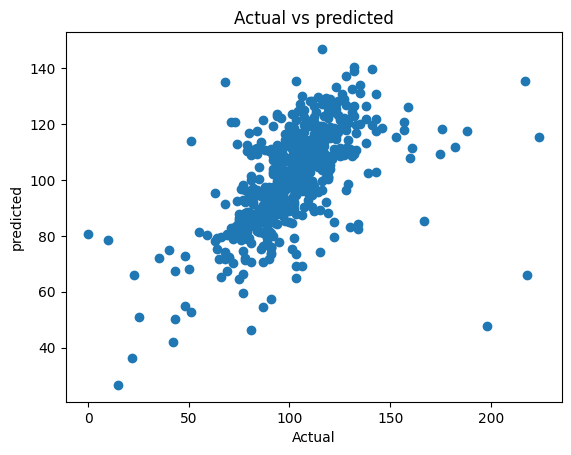

In [67]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [68]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 1ms/step


,Actual,predict,differences
898,87,94.492714,-7.492714
182,65,71.735863,-6.735863
565,103,101.850334,1.149666
457,69,80.512131,-11.512131
1852,104,110.293991,-6.293991
568,78,86.337997,-8.337997
1340,115,119.292885,-4.292885
778,85,81.794586,3.205414
562,104,99.177551,4.822449
716,95,77.655182,17.344818


## RNN

In [69]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [70]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 5s 29ms/step - loss: 6958.1929 - mae: 75.5859 - val_loss: 1695.8107 - val_mae: 33.2644
Epoch 2/2000
37/37 [==============================] - 0s 12ms/step - loss: 2044.0906 - mae: 36.5174 - val_loss: 1574.7930 - val_mae: 34.0755
Epoch 3/2000
37/37 [==============================] - 0s 12ms/step - loss: 1341.4130 - mae: 29.0802 - val_loss: 1045.5372 - val_mae: 26.4628
Epoch 4/2000
37/37 [==============================] - 0s 12ms/step - loss: 1122.8995 - mae: 26.3826 - val_loss: 1206.5249 - val_mae: 28.9689
Epoch 5/2000
37/37 [==============================] - 0s 13ms/step - loss: 949.5471 - mae: 24.3410 - val_loss: 1461.3357 - val_mae: 33.1301
Epoch 6/2000
37/37 [==============================] - 0s 12ms/step - loss: 883.9709 - mae: 23.3508 - val_loss: 1014.7540 - val_mae: 26.1823
Epoch 7/2000
37/37 [==============================] - 0s 12ms/step - loss: 867.9202 - mae: 23.0028 - val_loss: 767.3198 - val_mae: 21.3858
Epoch 8/2000
37/3

37/37 [==============================] - 1s 14ms/step - loss: 476.6029 - mae: 16.6180 - val_loss: 380.6975 - val_mae: 13.4100
Epoch 118/2000
37/37 [==============================] - 1s 14ms/step - loss: 471.6791 - mae: 16.8014 - val_loss: 306.1652 - val_mae: 11.5880
Epoch 119/2000
37/37 [==============================] - 1s 14ms/step - loss: 467.4527 - mae: 16.8736 - val_loss: 322.7989 - val_mae: 11.9151
Epoch 120/2000
37/37 [==============================] - 1s 14ms/step - loss: 433.5137 - mae: 15.9069 - val_loss: 336.3600 - val_mae: 12.1545
Epoch 121/2000
37/37 [==============================] - 1s 14ms/step - loss: 480.0074 - mae: 16.7273 - val_loss: 304.1887 - val_mae: 11.4445
Epoch 122/2000
37/37 [==============================] - 1s 14ms/step - loss: 454.8973 - mae: 16.0993 - val_loss: 409.0932 - val_mae: 14.0878
Epoch 123/2000
37/37 [==============================] - 1s 14ms/step - loss: 450.2710 - mae: 16.2131 - val_loss: 296.9902 - val_mae: 11.4498
Epoch 124/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 423.0497 - mae: 15.2975 - val_loss: 329.0127 - val_mae: 11.8229
Epoch 234/2000
37/37 [==============================] - 0s 12ms/step - loss: 424.6373 - mae: 15.4495 - val_loss: 305.4485 - val_mae: 10.9468
Epoch 235/2000
37/37 [==============================] - 0s 12ms/step - loss: 405.7384 - mae: 15.2347 - val_loss: 297.4490 - val_mae: 10.8893
Epoch 236/2000
37/37 [==============================] - 0s 12ms/step - loss: 430.8945 - mae: 15.9542 - val_loss: 294.9879 - val_mae: 11.4984
Epoch 237/2000
37/37 [==============================] - 0s 12ms/step - loss: 451.9714 - mae: 15.8460 - val_loss: 292.3205 - val_mae: 11.2860
Epoch 238/2000
37/37 [==============================] - 0s 12ms/step - loss: 430.1028 - mae: 15.3964 - val_loss: 295.0492 - val_mae: 10.8180
Epoch 239/2000
37/37 [==============================] - 0s 12ms/step - loss: 433.7831 - mae: 15.7368 - val_loss: 298.5068 - val_mae: 10.9710
Epoch 240/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 389.9581 - mae: 14.8869 - val_loss: 304.0339 - val_mae: 10.9371
Epoch 350/2000
37/37 [==============================] - 1s 14ms/step - loss: 388.0025 - mae: 14.8125 - val_loss: 293.1031 - val_mae: 10.9538
Epoch 351/2000
37/37 [==============================] - 1s 14ms/step - loss: 399.1967 - mae: 15.0433 - val_loss: 340.5543 - val_mae: 12.1931
Epoch 352/2000
37/37 [==============================] - 1s 14ms/step - loss: 385.8940 - mae: 14.7457 - val_loss: 356.1070 - val_mae: 12.9218
Epoch 353/2000
37/37 [==============================] - 1s 13ms/step - loss: 392.0596 - mae: 15.1653 - val_loss: 300.5763 - val_mae: 11.0100
Epoch 354/2000
37/37 [==============================] - 1s 14ms/step - loss: 370.5745 - mae: 14.4301 - val_loss: 318.6684 - val_mae: 11.3466
Epoch 355/2000
37/37 [==============================] - 1s 14ms/step - loss: 374.2816 - mae: 14.5717 - val_loss: 327.4148 - val_mae: 11.5285
Epoch 356/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 343.9012 - mae: 14.0560 - val_loss: 330.3035 - val_mae: 11.9854
Epoch 466/2000
37/37 [==============================] - 0s 12ms/step - loss: 348.9973 - mae: 14.0724 - val_loss: 352.9422 - val_mae: 12.7994
Epoch 467/2000
37/37 [==============================] - 0s 12ms/step - loss: 384.5131 - mae: 15.0017 - val_loss: 337.5366 - val_mae: 11.9707
Epoch 468/2000
37/37 [==============================] - 0s 12ms/step - loss: 361.7543 - mae: 14.2543 - val_loss: 344.8266 - val_mae: 12.3583
Epoch 469/2000
37/37 [==============================] - 0s 12ms/step - loss: 339.8264 - mae: 13.7657 - val_loss: 311.6790 - val_mae: 11.0509
Epoch 470/2000
37/37 [==============================] - 0s 12ms/step - loss: 383.5496 - mae: 14.8060 - val_loss: 389.6193 - val_mae: 12.1606
Epoch 471/2000
37/37 [==============================] - 0s 13ms/step - loss: 368.9991 - mae: 14.6280 - val_loss: 357.8951 - val_mae: 12.8404
Epoch 472/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 360.0849 - mae: 14.0501 - val_loss: 309.6786 - val_mae: 11.2589
Epoch 582/2000
37/37 [==============================] - 1s 14ms/step - loss: 340.2757 - mae: 14.0698 - val_loss: 340.0200 - val_mae: 11.8645
Epoch 583/2000
37/37 [==============================] - 1s 14ms/step - loss: 352.6385 - mae: 14.0375 - val_loss: 342.4199 - val_mae: 11.8315
Epoch 584/2000
37/37 [==============================] - 1s 14ms/step - loss: 342.5704 - mae: 13.8616 - val_loss: 318.3297 - val_mae: 11.4434
Epoch 585/2000
37/37 [==============================] - 1s 14ms/step - loss: 318.9276 - mae: 13.5340 - val_loss: 369.8717 - val_mae: 12.4736
Epoch 586/2000
37/37 [==============================] - 0s 13ms/step - loss: 361.6501 - mae: 14.1629 - val_loss: 360.8299 - val_mae: 12.2717
Epoch 587/2000
37/37 [==============================] - 0s 13ms/step - loss: 338.2868 - mae: 14.0425 - val_loss: 309.6530 - val_mae: 11.2795
Epoch 588/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 319.1154 - mae: 13.6484 - val_loss: 345.7906 - val_mae: 11.9296
Epoch 698/2000
37/37 [==============================] - 0s 13ms/step - loss: 308.0183 - mae: 13.0533 - val_loss: 344.1416 - val_mae: 11.5261
Epoch 699/2000
37/37 [==============================] - 0s 12ms/step - loss: 336.3707 - mae: 13.8751 - val_loss: 295.1189 - val_mae: 10.9873
Epoch 700/2000
37/37 [==============================] - 0s 12ms/step - loss: 318.4417 - mae: 13.5071 - val_loss: 358.4298 - val_mae: 11.7864
Epoch 701/2000
37/37 [==============================] - 0s 12ms/step - loss: 317.6502 - mae: 13.5605 - val_loss: 367.5744 - val_mae: 11.9571
Epoch 702/2000
37/37 [==============================] - 0s 12ms/step - loss: 299.3314 - mae: 13.2803 - val_loss: 344.7287 - val_mae: 11.9345
Epoch 703/2000
37/37 [==============================] - 0s 12ms/step - loss: 339.1926 - mae: 13.7962 - val_loss: 315.4328 - val_mae: 11.3099
Epoch 704/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 322.6434 - mae: 13.6057 - val_loss: 323.0590 - val_mae: 11.1205
Epoch 814/2000
37/37 [==============================] - 1s 14ms/step - loss: 322.0425 - mae: 13.3360 - val_loss: 337.2996 - val_mae: 11.7216
Epoch 815/2000
37/37 [==============================] - 1s 14ms/step - loss: 311.0917 - mae: 13.0030 - val_loss: 346.6687 - val_mae: 11.8193
Epoch 816/2000
37/37 [==============================] - 1s 14ms/step - loss: 316.4851 - mae: 13.4023 - val_loss: 358.4606 - val_mae: 11.7114
Epoch 817/2000
37/37 [==============================] - 1s 14ms/step - loss: 302.6842 - mae: 13.3864 - val_loss: 351.7144 - val_mae: 12.0340
Epoch 818/2000
37/37 [==============================] - 1s 14ms/step - loss: 328.0484 - mae: 13.6180 - val_loss: 346.0547 - val_mae: 11.9746
Epoch 819/2000
37/37 [==============================] - 1s 14ms/step - loss: 331.8843 - mae: 13.7023 - val_loss: 361.8650 - val_mae: 12.0890
Epoch 820/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 311.2468 - mae: 13.3411 - val_loss: 354.8304 - val_mae: 12.8263
Epoch 930/2000
37/37 [==============================] - 0s 12ms/step - loss: 306.3266 - mae: 13.1982 - val_loss: 328.4294 - val_mae: 11.9363
Epoch 931/2000
37/37 [==============================] - 0s 12ms/step - loss: 297.4966 - mae: 13.1272 - val_loss: 367.6199 - val_mae: 12.1389
Epoch 932/2000
37/37 [==============================] - 0s 12ms/step - loss: 298.4851 - mae: 13.1246 - val_loss: 348.2398 - val_mae: 11.4941
Epoch 933/2000
37/37 [==============================] - 0s 12ms/step - loss: 317.9776 - mae: 13.4849 - val_loss: 377.9955 - val_mae: 12.3332
Epoch 934/2000
37/37 [==============================] - 0s 12ms/step - loss: 286.7197 - mae: 12.8248 - val_loss: 372.0082 - val_mae: 11.8866
Epoch 935/2000
37/37 [==============================] - 0s 12ms/step - loss: 293.7717 - mae: 12.8634 - val_loss: 350.8724 - val_mae: 11.7215
Epoch 936/2000
37/37 [======

Epoch 1045/2000
37/37 [==============================] - 1s 15ms/step - loss: 278.3903 - mae: 12.6180 - val_loss: 358.6078 - val_mae: 12.4233
Epoch 1046/2000
37/37 [==============================] - 1s 14ms/step - loss: 302.2542 - mae: 12.9149 - val_loss: 346.0777 - val_mae: 11.8570
Epoch 1047/2000
37/37 [==============================] - 1s 14ms/step - loss: 277.2445 - mae: 12.5177 - val_loss: 370.5411 - val_mae: 12.6029
Epoch 1048/2000
37/37 [==============================] - 1s 16ms/step - loss: 285.5053 - mae: 12.9488 - val_loss: 370.2097 - val_mae: 11.7955
Epoch 1049/2000
37/37 [==============================] - 1s 16ms/step - loss: 298.7098 - mae: 12.8366 - val_loss: 345.8349 - val_mae: 11.3206
Epoch 1050/2000
37/37 [==============================] - 1s 14ms/step - loss: 300.9914 - mae: 13.3597 - val_loss: 343.3479 - val_mae: 11.9056
Epoch 1051/2000
37/37 [==============================] - 1s 15ms/step - loss: 290.0297 - mae: 12.9228 - val_loss: 334.4144 - val_mae: 11.6576
Epoch 

Epoch 1103/2000
37/37 [==============================] - 1s 14ms/step - loss: 299.2357 - mae: 13.0719 - val_loss: 355.4600 - val_mae: 12.1784
Epoch 1104/2000
37/37 [==============================] - 1s 14ms/step - loss: 270.9301 - mae: 12.4260 - val_loss: 354.9060 - val_mae: 11.9212
Epoch 1105/2000
37/37 [==============================] - 1s 19ms/step - loss: 300.6786 - mae: 13.2553 - val_loss: 367.3918 - val_mae: 11.9519
Epoch 1106/2000
37/37 [==============================] - 1s 17ms/step - loss: 281.4237 - mae: 12.6885 - val_loss: 352.8249 - val_mae: 11.9103
Epoch 1107/2000
37/37 [==============================] - 1s 19ms/step - loss: 256.9569 - mae: 12.0633 - val_loss: 352.0724 - val_mae: 11.7638
Epoch 1108/2000
37/37 [==============================] - 1s 17ms/step - loss: 295.7529 - mae: 12.8545 - val_loss: 354.7791 - val_mae: 11.7343
Epoch 1109/2000
37/37 [==============================] - 1s 17ms/step - loss: 278.7635 - mae: 12.4868 - val_loss: 353.9663 - val_mae: 12.0771
Epoch 

Epoch 1161/2000
37/37 [==============================] - 0s 13ms/step - loss: 285.3577 - mae: 12.5579 - val_loss: 351.3549 - val_mae: 11.5165
Epoch 1162/2000
37/37 [==============================] - 0s 13ms/step - loss: 287.5139 - mae: 12.6348 - val_loss: 365.9970 - val_mae: 11.6499
Epoch 1163/2000
37/37 [==============================] - 0s 13ms/step - loss: 280.5281 - mae: 12.5294 - val_loss: 398.2950 - val_mae: 12.5788
Epoch 1164/2000
37/37 [==============================] - 1s 14ms/step - loss: 281.3251 - mae: 12.5627 - val_loss: 340.8488 - val_mae: 11.2495
Epoch 1165/2000
37/37 [==============================] - 1s 14ms/step - loss: 270.1735 - mae: 12.2949 - val_loss: 362.3123 - val_mae: 11.8502
Epoch 1166/2000
37/37 [==============================] - 1s 15ms/step - loss: 268.1170 - mae: 12.2060 - val_loss: 333.0198 - val_mae: 11.1942
Epoch 1167/2000
37/37 [==============================] - 0s 13ms/step - loss: 267.5778 - mae: 12.4370 - val_loss: 357.1410 - val_mae: 11.7067
Epoch 

Epoch 1219/2000
37/37 [==============================] - 1s 20ms/step - loss: 273.3781 - mae: 12.6257 - val_loss: 364.4518 - val_mae: 12.0573
Epoch 1220/2000
37/37 [==============================] - 1s 19ms/step - loss: 282.3730 - mae: 12.5672 - val_loss: 364.7395 - val_mae: 11.9941
Epoch 1221/2000
37/37 [==============================] - 1s 20ms/step - loss: 263.1582 - mae: 12.2704 - val_loss: 357.0667 - val_mae: 11.5951
Epoch 1222/2000
37/37 [==============================] - 1s 20ms/step - loss: 277.9199 - mae: 12.6318 - val_loss: 335.9623 - val_mae: 11.4329
Epoch 1223/2000
37/37 [==============================] - 1s 19ms/step - loss: 279.5613 - mae: 12.3354 - val_loss: 380.7992 - val_mae: 11.9422
Epoch 1224/2000
37/37 [==============================] - 1s 20ms/step - loss: 253.8691 - mae: 12.0950 - val_loss: 377.6187 - val_mae: 11.8043
Epoch 1225/2000
37/37 [==============================] - 1s 20ms/step - loss: 269.2593 - mae: 12.3729 - val_loss: 372.6671 - val_mae: 11.6996
Epoch 

Epoch 1277/2000
37/37 [==============================] - 1s 20ms/step - loss: 271.0327 - mae: 12.4808 - val_loss: 386.1798 - val_mae: 12.0485
Epoch 1278/2000
37/37 [==============================] - 1s 20ms/step - loss: 258.8673 - mae: 12.0982 - val_loss: 373.8978 - val_mae: 12.6047
Epoch 1279/2000
37/37 [==============================] - 1s 19ms/step - loss: 295.6096 - mae: 12.8206 - val_loss: 360.1005 - val_mae: 12.3625
Epoch 1280/2000
37/37 [==============================] - 1s 20ms/step - loss: 282.2450 - mae: 12.5300 - val_loss: 355.0652 - val_mae: 11.6062
Epoch 1281/2000
37/37 [==============================] - 1s 20ms/step - loss: 264.1434 - mae: 12.3402 - val_loss: 346.1382 - val_mae: 11.5174
Epoch 1282/2000
37/37 [==============================] - 1s 20ms/step - loss: 263.4632 - mae: 12.3297 - val_loss: 337.3315 - val_mae: 11.5404
Epoch 1283/2000
37/37 [==============================] - 1s 20ms/step - loss: 270.5552 - mae: 12.4788 - val_loss: 331.0007 - val_mae: 11.4097
Epoch 

Epoch 1335/2000
37/37 [==============================] - 1s 20ms/step - loss: 260.5711 - mae: 12.2231 - val_loss: 397.8696 - val_mae: 11.8883
Epoch 1336/2000
37/37 [==============================] - 1s 20ms/step - loss: 263.6044 - mae: 12.1544 - val_loss: 379.6919 - val_mae: 11.9301
Epoch 1337/2000
37/37 [==============================] - 1s 20ms/step - loss: 261.0735 - mae: 12.1436 - val_loss: 365.8768 - val_mae: 12.1029
Epoch 1338/2000
37/37 [==============================] - 1s 20ms/step - loss: 249.0892 - mae: 12.1747 - val_loss: 351.6118 - val_mae: 11.8511
Epoch 1339/2000
37/37 [==============================] - 1s 21ms/step - loss: 269.0839 - mae: 12.2868 - val_loss: 379.2130 - val_mae: 12.2995
Epoch 1340/2000
37/37 [==============================] - 1s 20ms/step - loss: 271.5422 - mae: 12.3287 - val_loss: 349.8909 - val_mae: 11.4263
Epoch 1341/2000
37/37 [==============================] - 1s 20ms/step - loss: 261.2149 - mae: 12.1998 - val_loss: 364.9849 - val_mae: 11.8995
Epoch 

Epoch 1393/2000
37/37 [==============================] - 1s 20ms/step - loss: 268.2637 - mae: 12.0042 - val_loss: 379.7121 - val_mae: 12.0375
Epoch 1394/2000
37/37 [==============================] - 1s 20ms/step - loss: 265.1590 - mae: 12.1523 - val_loss: 396.7410 - val_mae: 11.9417
Epoch 1395/2000
37/37 [==============================] - 1s 21ms/step - loss: 261.9137 - mae: 12.1186 - val_loss: 404.9095 - val_mae: 12.5334
Epoch 1396/2000
37/37 [==============================] - 1s 21ms/step - loss: 275.0875 - mae: 12.5479 - val_loss: 387.6666 - val_mae: 11.9308
Epoch 1397/2000
37/37 [==============================] - 1s 21ms/step - loss: 252.3655 - mae: 12.0153 - val_loss: 403.8544 - val_mae: 12.5016
Epoch 1398/2000
37/37 [==============================] - 1s 20ms/step - loss: 254.2649 - mae: 12.0234 - val_loss: 352.2610 - val_mae: 11.4630
Epoch 1399/2000
37/37 [==============================] - 1s 20ms/step - loss: 245.5754 - mae: 12.2357 - val_loss: 386.7935 - val_mae: 12.4795
Epoch 

Epoch 1451/2000
37/37 [==============================] - 1s 20ms/step - loss: 251.2404 - mae: 11.8202 - val_loss: 349.4031 - val_mae: 11.7345
Epoch 1452/2000
37/37 [==============================] - 1s 20ms/step - loss: 270.8765 - mae: 12.3215 - val_loss: 360.6960 - val_mae: 11.7343
Epoch 1453/2000
37/37 [==============================] - 1s 20ms/step - loss: 255.9835 - mae: 11.8050 - val_loss: 346.4863 - val_mae: 11.3796
Epoch 1454/2000
37/37 [==============================] - 1s 21ms/step - loss: 275.4778 - mae: 12.4859 - val_loss: 350.0518 - val_mae: 11.5139
Epoch 1455/2000
37/37 [==============================] - 1s 20ms/step - loss: 272.1680 - mae: 12.5136 - val_loss: 377.5637 - val_mae: 12.2987
Epoch 1456/2000
37/37 [==============================] - 1s 20ms/step - loss: 234.5656 - mae: 11.7440 - val_loss: 406.3044 - val_mae: 12.5786
Epoch 1457/2000
37/37 [==============================] - 1s 20ms/step - loss: 264.3359 - mae: 12.3714 - val_loss: 372.9102 - val_mae: 11.8097
Epoch 

Epoch 1509/2000
37/37 [==============================] - 1s 24ms/step - loss: 251.1349 - mae: 12.0571 - val_loss: 396.2512 - val_mae: 11.9297
Epoch 1510/2000
37/37 [==============================] - 1s 26ms/step - loss: 247.2215 - mae: 11.8478 - val_loss: 354.6112 - val_mae: 11.7047
Epoch 1511/2000
37/37 [==============================] - 1s 22ms/step - loss: 231.6724 - mae: 11.5152 - val_loss: 369.7315 - val_mae: 12.5887
Epoch 1512/2000
37/37 [==============================] - 1s 22ms/step - loss: 243.6288 - mae: 11.8242 - val_loss: 388.6660 - val_mae: 11.9578
Epoch 1513/2000
37/37 [==============================] - 1s 20ms/step - loss: 232.9784 - mae: 11.5513 - val_loss: 364.7135 - val_mae: 11.7042
Epoch 1514/2000
37/37 [==============================] - 1s 22ms/step - loss: 265.2668 - mae: 12.2617 - val_loss: 360.1082 - val_mae: 12.0172
Epoch 1515/2000
37/37 [==============================] - 1s 20ms/step - loss: 254.5861 - mae: 11.8400 - val_loss: 329.3310 - val_mae: 11.2897
Epoch 

Epoch 1567/2000
37/37 [==============================] - 1s 20ms/step - loss: 252.2551 - mae: 12.0176 - val_loss: 359.3797 - val_mae: 11.7607
Epoch 1568/2000
37/37 [==============================] - 1s 20ms/step - loss: 253.0371 - mae: 12.2110 - val_loss: 385.3785 - val_mae: 12.4720
Epoch 1569/2000
37/37 [==============================] - 1s 21ms/step - loss: 254.3555 - mae: 11.9174 - val_loss: 336.3372 - val_mae: 11.4924
Epoch 1570/2000
37/37 [==============================] - 1s 20ms/step - loss: 278.4561 - mae: 12.1816 - val_loss: 382.2383 - val_mae: 11.8317
Epoch 1571/2000
37/37 [==============================] - 1s 20ms/step - loss: 264.7694 - mae: 12.1973 - val_loss: 370.7943 - val_mae: 11.6457
Epoch 1572/2000
37/37 [==============================] - 1s 20ms/step - loss: 253.1812 - mae: 11.7744 - val_loss: 358.1615 - val_mae: 11.4903
Epoch 1573/2000
37/37 [==============================] - 1s 20ms/step - loss: 257.9304 - mae: 12.1006 - val_loss: 337.6195 - val_mae: 11.2222
Epoch 

Epoch 1625/2000
37/37 [==============================] - 1s 21ms/step - loss: 239.3015 - mae: 11.8890 - val_loss: 357.3268 - val_mae: 11.9885
Epoch 1626/2000
37/37 [==============================] - 1s 20ms/step - loss: 242.3857 - mae: 11.6460 - val_loss: 354.0780 - val_mae: 11.9058
Epoch 1627/2000
37/37 [==============================] - 1s 19ms/step - loss: 241.3884 - mae: 11.7233 - val_loss: 374.1704 - val_mae: 11.8470
Epoch 1628/2000
37/37 [==============================] - 1s 21ms/step - loss: 286.3430 - mae: 12.7330 - val_loss: 375.7089 - val_mae: 11.7241
Epoch 1629/2000
37/37 [==============================] - 1s 20ms/step - loss: 236.9133 - mae: 11.7142 - val_loss: 381.4852 - val_mae: 12.6165
Epoch 1630/2000
37/37 [==============================] - 1s 20ms/step - loss: 240.4606 - mae: 11.6272 - val_loss: 361.9288 - val_mae: 11.7924
Epoch 1631/2000
37/37 [==============================] - 1s 21ms/step - loss: 244.1313 - mae: 11.9104 - val_loss: 377.3861 - val_mae: 12.1672
Epoch 

Epoch 1683/2000
37/37 [==============================] - 1s 20ms/step - loss: 223.4879 - mae: 11.3232 - val_loss: 379.0853 - val_mae: 11.8354
Epoch 1684/2000
37/37 [==============================] - 1s 20ms/step - loss: 245.2345 - mae: 11.8111 - val_loss: 360.1082 - val_mae: 11.6628
Epoch 1685/2000
37/37 [==============================] - 1s 21ms/step - loss: 246.5413 - mae: 11.5597 - val_loss: 364.1132 - val_mae: 11.6907
Epoch 1686/2000
37/37 [==============================] - 1s 20ms/step - loss: 231.5336 - mae: 11.4971 - val_loss: 376.2543 - val_mae: 12.1613
Epoch 1687/2000
37/37 [==============================] - 1s 20ms/step - loss: 231.8431 - mae: 11.4193 - val_loss: 410.5855 - val_mae: 12.5885
Epoch 1688/2000
37/37 [==============================] - 1s 20ms/step - loss: 256.4356 - mae: 11.8201 - val_loss: 361.2003 - val_mae: 11.4281
Epoch 1689/2000
37/37 [==============================] - 1s 19ms/step - loss: 239.7280 - mae: 11.5342 - val_loss: 383.4506 - val_mae: 11.6410
Epoch 

Epoch 1741/2000
37/37 [==============================] - 1s 20ms/step - loss: 241.4353 - mae: 11.7018 - val_loss: 368.3809 - val_mae: 11.8172
Epoch 1742/2000
37/37 [==============================] - 1s 20ms/step - loss: 240.8278 - mae: 11.5119 - val_loss: 387.5157 - val_mae: 12.3351
Epoch 1743/2000
37/37 [==============================] - 1s 21ms/step - loss: 238.7028 - mae: 11.4964 - val_loss: 366.2483 - val_mae: 12.3451
Epoch 1744/2000
37/37 [==============================] - 1s 21ms/step - loss: 235.6235 - mae: 11.4884 - val_loss: 366.7558 - val_mae: 11.7193
Epoch 1745/2000
37/37 [==============================] - 1s 22ms/step - loss: 225.3929 - mae: 11.2771 - val_loss: 434.6715 - val_mae: 13.9477
Epoch 1746/2000
37/37 [==============================] - 1s 20ms/step - loss: 256.5316 - mae: 11.9975 - val_loss: 379.8794 - val_mae: 12.0702
Epoch 1747/2000
37/37 [==============================] - 1s 20ms/step - loss: 238.8727 - mae: 11.4598 - val_loss: 411.8542 - val_mae: 12.9321
Epoch 

Epoch 1799/2000
37/37 [==============================] - 1s 20ms/step - loss: 217.9462 - mae: 11.2912 - val_loss: 363.9612 - val_mae: 11.8967
Epoch 1800/2000
37/37 [==============================] - 1s 19ms/step - loss: 246.1829 - mae: 11.7802 - val_loss: 369.8654 - val_mae: 11.8544
Epoch 1801/2000
37/37 [==============================] - 1s 21ms/step - loss: 227.9329 - mae: 11.3914 - val_loss: 358.1301 - val_mae: 11.8665
Epoch 1802/2000
37/37 [==============================] - 1s 21ms/step - loss: 233.5461 - mae: 11.5789 - val_loss: 381.9819 - val_mae: 11.8316
Epoch 1803/2000
37/37 [==============================] - 1s 20ms/step - loss: 202.4052 - mae: 10.9549 - val_loss: 400.5640 - val_mae: 12.0610
Epoch 1804/2000
37/37 [==============================] - 1s 20ms/step - loss: 209.7601 - mae: 10.9842 - val_loss: 378.7057 - val_mae: 12.0890
Epoch 1805/2000
37/37 [==============================] - 1s 20ms/step - loss: 234.3273 - mae: 11.6027 - val_loss: 368.8330 - val_mae: 11.8886
Epoch 

Epoch 1857/2000
37/37 [==============================] - 1s 21ms/step - loss: 219.2054 - mae: 11.1921 - val_loss: 397.9226 - val_mae: 12.5191
Epoch 1858/2000
37/37 [==============================] - 1s 19ms/step - loss: 208.4062 - mae: 11.0018 - val_loss: 382.8282 - val_mae: 12.1569
Epoch 1859/2000
37/37 [==============================] - 1s 20ms/step - loss: 245.4622 - mae: 11.6974 - val_loss: 429.8648 - val_mae: 12.7390
Epoch 1860/2000
37/37 [==============================] - 1s 20ms/step - loss: 236.2715 - mae: 11.2251 - val_loss: 371.0331 - val_mae: 11.9975
Epoch 1861/2000
37/37 [==============================] - 1s 20ms/step - loss: 251.1940 - mae: 11.6710 - val_loss: 367.4862 - val_mae: 11.8228
Epoch 1862/2000
37/37 [==============================] - 1s 21ms/step - loss: 220.7898 - mae: 11.3066 - val_loss: 380.1110 - val_mae: 11.9643
Epoch 1863/2000
37/37 [==============================] - 1s 20ms/step - loss: 217.9842 - mae: 11.2622 - val_loss: 392.4846 - val_mae: 12.0235
Epoch 

Epoch 1915/2000
37/37 [==============================] - 1s 20ms/step - loss: 215.5877 - mae: 11.1478 - val_loss: 406.1994 - val_mae: 13.1729
Epoch 1916/2000
37/37 [==============================] - 1s 21ms/step - loss: 221.2293 - mae: 11.1536 - val_loss: 363.3168 - val_mae: 11.7140
Epoch 1917/2000
37/37 [==============================] - 1s 20ms/step - loss: 230.4930 - mae: 11.2519 - val_loss: 377.7260 - val_mae: 12.3486
Epoch 1918/2000
37/37 [==============================] - 1s 22ms/step - loss: 198.3233 - mae: 10.6862 - val_loss: 374.8141 - val_mae: 12.0332
Epoch 1919/2000
37/37 [==============================] - 1s 22ms/step - loss: 205.1594 - mae: 10.7327 - val_loss: 376.7954 - val_mae: 12.0538
Epoch 1920/2000
37/37 [==============================] - 1s 20ms/step - loss: 209.7657 - mae: 10.9407 - val_loss: 384.9534 - val_mae: 12.1145
Epoch 1921/2000
37/37 [==============================] - 1s 19ms/step - loss: 218.6674 - mae: 11.1186 - val_loss: 375.8580 - val_mae: 11.9770
Epoch 

Epoch 1973/2000
37/37 [==============================] - 1s 17ms/step - loss: 221.8442 - mae: 10.9313 - val_loss: 391.9372 - val_mae: 12.7179
Epoch 1974/2000
37/37 [==============================] - 1s 16ms/step - loss: 230.9260 - mae: 11.2782 - val_loss: 369.4868 - val_mae: 12.1396
Epoch 1975/2000
37/37 [==============================] - 1s 16ms/step - loss: 215.0964 - mae: 10.8190 - val_loss: 359.2536 - val_mae: 11.7589
Epoch 1976/2000
37/37 [==============================] - 1s 16ms/step - loss: 218.5785 - mae: 10.9674 - val_loss: 351.5422 - val_mae: 11.7155
Epoch 1977/2000
37/37 [==============================] - 1s 16ms/step - loss: 232.2184 - mae: 11.4928 - val_loss: 371.0627 - val_mae: 12.4576
Epoch 1978/2000
37/37 [==============================] - 1s 16ms/step - loss: 208.8571 - mae: 10.9308 - val_loss: 375.7543 - val_mae: 12.5147
Epoch 1979/2000
37/37 [==============================] - 1s 16ms/step - loss: 214.8680 - mae: 11.0231 - val_loss: 376.3750 - val_mae: 12.3529
Epoch 

In [71]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

23/23 [==============================] - 1s 5ms/step


0.21492667739073867

In [72]:
prediction =np.squeeze(model3.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 866ms/step
Prediction: 103.57444763183594


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 5ms/step
mean squired error: 382.83223653422505
mean absolute error: 11.31334396169967


23/23 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Actual vs predicted')

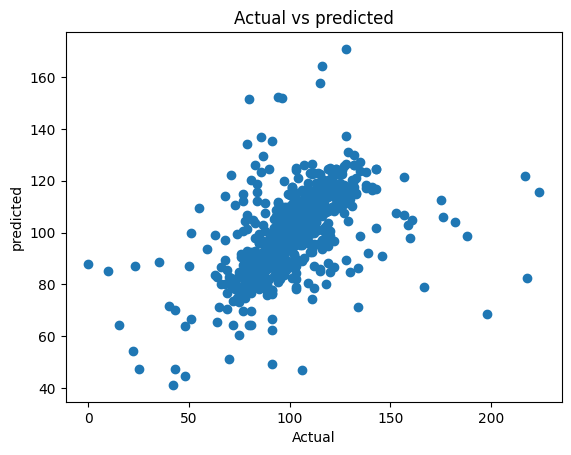

In [74]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [75]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 5ms/step


,Actual,predict,differences
898,87,92.624992,-5.624992
182,65,71.146904,-6.146904
565,103,101.967796,1.032204
457,69,76.856934,-7.856934
1852,104,101.561958,2.438042
568,78,81.115761,-3.115761
1340,115,157.647644,-42.647644
778,85,80.201370,4.798630
562,104,100.609047,3.390953
716,95,81.989670,13.010330


## keras tuner with dense

In [76]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_14132\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [77]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [78]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [79]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [80]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 8ms/step - loss: 48.0712 - mean_absolute_error: 48.0712 - val_loss: 14.1938 - val_mean_absolute_error: 14.1938
Epoch 2/2000
37/37 [==============================] - 0s 4ms/step - loss: 14.3332 - mean_absolute_error: 14.3332 - val_loss: 20.4146 - val_mean_absolute_error: 20.4146
Epoch 3/2000
37/37 [==============================] - 0s 5ms/step - loss: 14.5844 - mean_absolute_error: 14.5844 - val_loss: 18.7899 - val_mean_absolute_error: 18.7899
Epoch 4/2000
37/37 [==============================] - 0s 4ms/step - loss: 15.2808 - mean_absolute_error: 15.2808 - val_loss: 16.9301 - val_mean_absolute_error: 16.9301
Epoch 5/2000
37/37 [==============================] - 0s 4ms/step - loss: 13.6504 - mean_absolute_error: 13.6504 - val_loss: 13.9529 - val_mean_absolute_error: 13.9529
Epoch 6/2000
37/37 [==============================] - 0s 4ms/step - loss: 13.9179 - mean_absolute_error: 13.9179 - val_loss: 13.8154 - val_mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 12.2122 - mean_absolute_error: 12.2122 - val_loss: 13.3981 - val_mean_absolute_error: 13.3981
Epoch 98/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.0938 - mean_absolute_error: 12.0938 - val_loss: 12.0682 - val_mean_absolute_error: 12.0682
Epoch 99/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.2734 - mean_absolute_error: 12.2734 - val_loss: 11.8749 - val_mean_absolute_error: 11.8749
Epoch 100/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.8122 - mean_absolute_error: 12.8122 - val_loss: 11.9289 - val_mean_absolute_error: 11.9289
Epoch 101/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9456 - mean_absolute_error: 11.9456 - val_loss: 12.6676 - val_mean_absolute_error: 12.6676
Epoch 102/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.4535 - mean_absolute_error: 12.4535 - val_loss: 11.8032 - val_mean_absolute_error: 11.80

37/37 [==============================] - 0s 4ms/step - loss: 12.3654 - mean_absolute_error: 12.3654 - val_loss: 14.7191 - val_mean_absolute_error: 14.7191
Epoch 194/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.6838 - mean_absolute_error: 12.6838 - val_loss: 12.3271 - val_mean_absolute_error: 12.3271
Epoch 195/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.0606 - mean_absolute_error: 12.0606 - val_loss: 11.9760 - val_mean_absolute_error: 11.9760
Epoch 196/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.4101 - mean_absolute_error: 12.4101 - val_loss: 12.1716 - val_mean_absolute_error: 12.1716
Epoch 197/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.2819 - mean_absolute_error: 12.2819 - val_loss: 13.7683 - val_mean_absolute_error: 13.7683
Epoch 198/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3697 - mean_absolute_error: 12.3697 - val_loss: 13.7756 - val_mean_absolute_error: 13.

37/37 [==============================] - 0s 4ms/step - loss: 12.2734 - mean_absolute_error: 12.2734 - val_loss: 12.5072 - val_mean_absolute_error: 12.5072
Epoch 290/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.0269 - mean_absolute_error: 12.0269 - val_loss: 16.3969 - val_mean_absolute_error: 16.3969
Epoch 291/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.4574 - mean_absolute_error: 12.4574 - val_loss: 13.9764 - val_mean_absolute_error: 13.9764
Epoch 292/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3468 - mean_absolute_error: 12.3468 - val_loss: 12.3627 - val_mean_absolute_error: 12.3627
Epoch 293/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.1634 - mean_absolute_error: 12.1634 - val_loss: 12.5221 - val_mean_absolute_error: 12.5221
Epoch 294/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.2093 - mean_absolute_error: 12.2093 - val_loss: 11.9192 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 3ms/step - loss: 12.2532 - mean_absolute_error: 12.2532 - val_loss: 11.8810 - val_mean_absolute_error: 11.8810
Epoch 386/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9011 - mean_absolute_error: 11.9011 - val_loss: 12.0362 - val_mean_absolute_error: 12.0362
Epoch 387/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9742 - mean_absolute_error: 11.9742 - val_loss: 11.8675 - val_mean_absolute_error: 11.8675
Epoch 388/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9442 - mean_absolute_error: 11.9442 - val_loss: 11.8739 - val_mean_absolute_error: 11.8739
Epoch 389/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9444 - mean_absolute_error: 11.9444 - val_loss: 11.9098 - val_mean_absolute_error: 11.9098
Epoch 390/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7327 - mean_absolute_error: 11.7327 - val_loss: 11.8926 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 4ms/step - loss: 12.0555 - mean_absolute_error: 12.0555 - val_loss: 11.8960 - val_mean_absolute_error: 11.8960
Epoch 482/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.5490 - mean_absolute_error: 12.5490 - val_loss: 12.5348 - val_mean_absolute_error: 12.5348
Epoch 483/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.2031 - mean_absolute_error: 12.2031 - val_loss: 12.0877 - val_mean_absolute_error: 12.0877
Epoch 484/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3274 - mean_absolute_error: 12.3274 - val_loss: 12.4396 - val_mean_absolute_error: 12.4396
Epoch 485/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.4711 - mean_absolute_error: 12.4711 - val_loss: 11.8908 - val_mean_absolute_error: 11.8908
Epoch 486/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8057 - mean_absolute_error: 11.8057 - val_loss: 12.3028 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 3ms/step - loss: 12.8844 - mean_absolute_error: 12.8844 - val_loss: 11.9459 - val_mean_absolute_error: 11.9459
Epoch 578/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.5787 - mean_absolute_error: 12.5787 - val_loss: 12.5312 - val_mean_absolute_error: 12.5312
Epoch 579/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.2145 - mean_absolute_error: 12.2145 - val_loss: 12.4894 - val_mean_absolute_error: 12.4894
Epoch 580/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.5694 - mean_absolute_error: 12.5694 - val_loss: 11.9536 - val_mean_absolute_error: 11.9536
Epoch 581/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0163 - mean_absolute_error: 12.0163 - val_loss: 11.9686 - val_mean_absolute_error: 11.9686
Epoch 582/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8952 - mean_absolute_error: 11.8952 - val_loss: 12.5256 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 4ms/step - loss: 12.4136 - mean_absolute_error: 12.4136 - val_loss: 12.0155 - val_mean_absolute_error: 12.0155
Epoch 674/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8366 - mean_absolute_error: 11.8366 - val_loss: 12.2202 - val_mean_absolute_error: 12.2202
Epoch 675/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9472 - mean_absolute_error: 11.9472 - val_loss: 12.2105 - val_mean_absolute_error: 12.2105
Epoch 676/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.2940 - mean_absolute_error: 12.2940 - val_loss: 12.0095 - val_mean_absolute_error: 12.0095
Epoch 677/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.2236 - mean_absolute_error: 12.2236 - val_loss: 12.3864 - val_mean_absolute_error: 12.3864
Epoch 678/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.2340 - mean_absolute_error: 12.2340 - val_loss: 12.8898 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 4ms/step - loss: 11.9353 - mean_absolute_error: 11.9353 - val_loss: 12.7231 - val_mean_absolute_error: 12.7231
Epoch 770/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9242 - mean_absolute_error: 11.9242 - val_loss: 13.2018 - val_mean_absolute_error: 13.2018
Epoch 771/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0566 - mean_absolute_error: 12.0566 - val_loss: 12.0498 - val_mean_absolute_error: 12.0498
Epoch 772/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.5916 - mean_absolute_error: 12.5916 - val_loss: 16.0977 - val_mean_absolute_error: 16.0977
Epoch 773/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.4729 - mean_absolute_error: 12.4729 - val_loss: 12.0414 - val_mean_absolute_error: 12.0414
Epoch 774/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9206 - mean_absolute_error: 11.9206 - val_loss: 12.3652 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 3ms/step - loss: 11.8826 - mean_absolute_error: 11.8826 - val_loss: 13.3911 - val_mean_absolute_error: 13.3911
Epoch 866/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.3897 - mean_absolute_error: 12.3897 - val_loss: 12.5474 - val_mean_absolute_error: 12.5474
Epoch 867/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3132 - mean_absolute_error: 12.3132 - val_loss: 12.1485 - val_mean_absolute_error: 12.1485
Epoch 868/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9303 - mean_absolute_error: 11.9303 - val_loss: 11.9431 - val_mean_absolute_error: 11.9431
Epoch 869/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9584 - mean_absolute_error: 11.9584 - val_loss: 12.0033 - val_mean_absolute_error: 12.0033
Epoch 870/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.6221 - mean_absolute_error: 12.6221 - val_loss: 14.3936 - val_mean_absolute_error: 14.

37/37 [==============================] - 0s 4ms/step - loss: 12.2361 - mean_absolute_error: 12.2361 - val_loss: 12.2397 - val_mean_absolute_error: 12.2397
Epoch 962/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8941 - mean_absolute_error: 11.8941 - val_loss: 12.0886 - val_mean_absolute_error: 12.0886
Epoch 963/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9246 - mean_absolute_error: 11.9246 - val_loss: 11.9454 - val_mean_absolute_error: 11.9454
Epoch 964/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9914 - mean_absolute_error: 11.9914 - val_loss: 11.9432 - val_mean_absolute_error: 11.9432
Epoch 965/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.2197 - mean_absolute_error: 12.2197 - val_loss: 12.2986 - val_mean_absolute_error: 12.2986
Epoch 966/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8751 - mean_absolute_error: 11.8751 - val_loss: 12.0364 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 4ms/step - loss: 12.3681 - mean_absolute_error: 12.3681 - val_loss: 11.9637 - val_mean_absolute_error: 11.9637
Epoch 1058/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.1888 - mean_absolute_error: 12.1888 - val_loss: 12.7753 - val_mean_absolute_error: 12.7753
Epoch 1059/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.0914 - mean_absolute_error: 12.0914 - val_loss: 12.1600 - val_mean_absolute_error: 12.1600
Epoch 1060/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8720 - mean_absolute_error: 11.8720 - val_loss: 12.0074 - val_mean_absolute_error: 12.0074
Epoch 1061/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.6724 - mean_absolute_error: 11.6724 - val_loss: 12.1278 - val_mean_absolute_error: 12.1278
Epoch 1062/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.4657 - mean_absolute_error: 12.4657 - val_loss: 13.5583 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 11.8392 - mean_absolute_error: 11.8392 - val_loss: 11.9324 - val_mean_absolute_error: 11.9324
Epoch 1106/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9133 - mean_absolute_error: 11.9133 - val_loss: 12.0060 - val_mean_absolute_error: 12.0060
Epoch 1107/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9899 - mean_absolute_error: 11.9899 - val_loss: 12.2220 - val_mean_absolute_error: 12.2220
Epoch 1108/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8215 - mean_absolute_error: 11.8215 - val_loss: 13.2499 - val_mean_absolute_error: 13.2499
Epoch 1109/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0663 - mean_absolute_error: 12.0663 - val_loss: 13.8538 - val_mean_absolute_error: 13.8538
Epoch 1110/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3245 - mean_absolute_error: 12.3245 - val_loss: 13.9616 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 12.3540 - mean_absolute_error: 12.3540 - val_loss: 12.5990 - val_mean_absolute_error: 12.5990
Epoch 1154/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9122 - mean_absolute_error: 11.9122 - val_loss: 12.1224 - val_mean_absolute_error: 12.1224
Epoch 1155/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9139 - mean_absolute_error: 11.9139 - val_loss: 12.2442 - val_mean_absolute_error: 12.2442
Epoch 1156/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.2024 - mean_absolute_error: 12.2024 - val_loss: 14.9251 - val_mean_absolute_error: 14.9251
Epoch 1157/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.0085 - mean_absolute_error: 12.0085 - val_loss: 11.9482 - val_mean_absolute_error: 11.9482
Epoch 1158/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8379 - mean_absolute_error: 11.8379 - val_loss: 12.7283 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 12.1177 - mean_absolute_error: 12.1177 - val_loss: 12.1844 - val_mean_absolute_error: 12.1844
Epoch 1202/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8085 - mean_absolute_error: 11.8085 - val_loss: 11.9232 - val_mean_absolute_error: 11.9232
Epoch 1203/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7870 - mean_absolute_error: 11.7870 - val_loss: 11.9809 - val_mean_absolute_error: 11.9809
Epoch 1204/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7480 - mean_absolute_error: 11.7480 - val_loss: 11.9415 - val_mean_absolute_error: 11.9415
Epoch 1205/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8990 - mean_absolute_error: 11.8990 - val_loss: 12.5970 - val_mean_absolute_error: 12.5970
Epoch 1206/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.1023 - mean_absolute_error: 12.1023 - val_loss: 11.9169 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 11.8775 - mean_absolute_error: 11.8775 - val_loss: 12.3815 - val_mean_absolute_error: 12.3815
Epoch 1250/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.3261 - mean_absolute_error: 12.3261 - val_loss: 12.1526 - val_mean_absolute_error: 12.1526
Epoch 1251/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.1488 - mean_absolute_error: 12.1488 - val_loss: 13.4686 - val_mean_absolute_error: 13.4686
Epoch 1252/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0819 - mean_absolute_error: 12.0819 - val_loss: 11.9638 - val_mean_absolute_error: 11.9638
Epoch 1253/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7751 - mean_absolute_error: 11.7751 - val_loss: 12.6692 - val_mean_absolute_error: 12.6692
Epoch 1254/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9391 - mean_absolute_error: 11.9391 - val_loss: 12.0729 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 12.4176 - mean_absolute_error: 12.4176 - val_loss: 12.1247 - val_mean_absolute_error: 12.1247
Epoch 1298/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7639 - mean_absolute_error: 11.7639 - val_loss: 12.0818 - val_mean_absolute_error: 12.0818
Epoch 1299/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7784 - mean_absolute_error: 11.7784 - val_loss: 12.0849 - val_mean_absolute_error: 12.0849
Epoch 1300/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7916 - mean_absolute_error: 11.7916 - val_loss: 12.1120 - val_mean_absolute_error: 12.1120
Epoch 1301/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9239 - mean_absolute_error: 11.9239 - val_loss: 12.6147 - val_mean_absolute_error: 12.6147
Epoch 1302/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7139 - mean_absolute_error: 11.7139 - val_loss: 12.0775 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 11.9240 - mean_absolute_error: 11.9240 - val_loss: 12.5794 - val_mean_absolute_error: 12.5794
Epoch 1346/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8404 - mean_absolute_error: 11.8404 - val_loss: 11.9635 - val_mean_absolute_error: 11.9635
Epoch 1347/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9375 - mean_absolute_error: 11.9375 - val_loss: 12.7353 - val_mean_absolute_error: 12.7353
Epoch 1348/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8872 - mean_absolute_error: 11.8872 - val_loss: 12.3024 - val_mean_absolute_error: 12.3024
Epoch 1349/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.6958 - mean_absolute_error: 11.6958 - val_loss: 12.0468 - val_mean_absolute_error: 12.0468
Epoch 1350/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0038 - mean_absolute_error: 12.0038 - val_loss: 13.1008 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 12.1105 - mean_absolute_error: 12.1105 - val_loss: 14.2242 - val_mean_absolute_error: 14.2242
Epoch 1394/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.3768 - mean_absolute_error: 12.3768 - val_loss: 14.0016 - val_mean_absolute_error: 14.0016
Epoch 1395/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3068 - mean_absolute_error: 12.3068 - val_loss: 11.9943 - val_mean_absolute_error: 11.9943
Epoch 1396/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0475 - mean_absolute_error: 12.0475 - val_loss: 12.6349 - val_mean_absolute_error: 12.6349
Epoch 1397/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9700 - mean_absolute_error: 11.9700 - val_loss: 12.9895 - val_mean_absolute_error: 12.9895
Epoch 1398/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7448 - mean_absolute_error: 11.7448 - val_loss: 11.9684 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 11.9313 - mean_absolute_error: 11.9313 - val_loss: 12.4465 - val_mean_absolute_error: 12.4465
Epoch 1442/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8629 - mean_absolute_error: 11.8629 - val_loss: 12.0062 - val_mean_absolute_error: 12.0062
Epoch 1443/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8311 - mean_absolute_error: 11.8311 - val_loss: 12.1112 - val_mean_absolute_error: 12.1112
Epoch 1444/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.2193 - mean_absolute_error: 12.2193 - val_loss: 14.8384 - val_mean_absolute_error: 14.8384
Epoch 1445/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.1002 - mean_absolute_error: 12.1002 - val_loss: 12.4036 - val_mean_absolute_error: 12.4036
Epoch 1446/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.4629 - mean_absolute_error: 12.4629 - val_loss: 14.3819 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 11.9270 - mean_absolute_error: 11.9270 - val_loss: 11.9323 - val_mean_absolute_error: 11.9323
Epoch 1490/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8883 - mean_absolute_error: 11.8883 - val_loss: 11.9286 - val_mean_absolute_error: 11.9286
Epoch 1491/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.7961 - mean_absolute_error: 11.7961 - val_loss: 12.0582 - val_mean_absolute_error: 12.0582
Epoch 1492/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9645 - mean_absolute_error: 11.9645 - val_loss: 12.1653 - val_mean_absolute_error: 12.1653
Epoch 1493/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8160 - mean_absolute_error: 11.8160 - val_loss: 13.3459 - val_mean_absolute_error: 13.3459
Epoch 1494/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9375 - mean_absolute_error: 11.9375 - val_loss: 12.0416 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 11.7864 - mean_absolute_error: 11.7864 - val_loss: 12.0766 - val_mean_absolute_error: 12.0766
Epoch 1538/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9855 - mean_absolute_error: 11.9855 - val_loss: 12.2876 - val_mean_absolute_error: 12.2876
Epoch 1539/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8048 - mean_absolute_error: 11.8048 - val_loss: 12.4804 - val_mean_absolute_error: 12.4804
Epoch 1540/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.1089 - mean_absolute_error: 12.1089 - val_loss: 13.3714 - val_mean_absolute_error: 13.3714
Epoch 1541/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.1233 - mean_absolute_error: 12.1233 - val_loss: 12.1874 - val_mean_absolute_error: 12.1874
Epoch 1542/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8020 - mean_absolute_error: 11.8020 - val_loss: 12.0178 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 12.1244 - mean_absolute_error: 12.1244 - val_loss: 12.0383 - val_mean_absolute_error: 12.0383
Epoch 1586/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0060 - mean_absolute_error: 12.0060 - val_loss: 12.1571 - val_mean_absolute_error: 12.1571
Epoch 1587/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9625 - mean_absolute_error: 11.9625 - val_loss: 12.0762 - val_mean_absolute_error: 12.0762
Epoch 1588/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0758 - mean_absolute_error: 12.0758 - val_loss: 11.9252 - val_mean_absolute_error: 11.9252
Epoch 1589/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7642 - mean_absolute_error: 11.7642 - val_loss: 13.4630 - val_mean_absolute_error: 13.4630
Epoch 1590/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.1130 - mean_absolute_error: 12.1130 - val_loss: 12.0272 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 11.9808 - mean_absolute_error: 11.9808 - val_loss: 12.4264 - val_mean_absolute_error: 12.4264
Epoch 1634/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.8285 - mean_absolute_error: 11.8285 - val_loss: 12.0938 - val_mean_absolute_error: 12.0938
Epoch 1635/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7803 - mean_absolute_error: 11.7803 - val_loss: 12.0873 - val_mean_absolute_error: 12.0873
Epoch 1636/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8594 - mean_absolute_error: 11.8594 - val_loss: 12.2685 - val_mean_absolute_error: 12.2685
Epoch 1637/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7602 - mean_absolute_error: 11.7602 - val_loss: 11.9490 - val_mean_absolute_error: 11.9490
Epoch 1638/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7425 - mean_absolute_error: 11.7425 - val_loss: 12.8261 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 12.1431 - mean_absolute_error: 12.1431 - val_loss: 12.1221 - val_mean_absolute_error: 12.1221
Epoch 1682/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9876 - mean_absolute_error: 11.9876 - val_loss: 13.4028 - val_mean_absolute_error: 13.4028
Epoch 1683/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0729 - mean_absolute_error: 12.0729 - val_loss: 11.9957 - val_mean_absolute_error: 11.9957
Epoch 1684/2000
37/37 [==============================] - 0s 3ms/step - loss: 12.0025 - mean_absolute_error: 12.0025 - val_loss: 13.2722 - val_mean_absolute_error: 13.2722
Epoch 1685/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9204 - mean_absolute_error: 11.9204 - val_loss: 12.1570 - val_mean_absolute_error: 12.1570
Epoch 1686/2000
37/37 [==============================] - 0s 3ms/step - loss: 11.9488 - mean_absolute_error: 11.9488 - val_loss: 13.4356 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 12.4996 - mean_absolute_error: 12.4996 - val_loss: 12.5475 - val_mean_absolute_error: 12.5475
Epoch 1730/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.2074 - mean_absolute_error: 12.2074 - val_loss: 11.9479 - val_mean_absolute_error: 11.9479
Epoch 1731/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9689 - mean_absolute_error: 11.9689 - val_loss: 13.2550 - val_mean_absolute_error: 13.2550
Epoch 1732/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.8036 - mean_absolute_error: 12.8036 - val_loss: 14.1557 - val_mean_absolute_error: 14.1557
Epoch 1733/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.9044 - mean_absolute_error: 12.9044 - val_loss: 13.6783 - val_mean_absolute_error: 13.6783
Epoch 1734/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.3205 - mean_absolute_error: 12.3205 - val_loss: 12.5074 - val_mean_absolute_error

37/37 [==============================] - 0s 6ms/step - loss: 11.7957 - mean_absolute_error: 11.7957 - val_loss: 12.1876 - val_mean_absolute_error: 12.1876
Epoch 1778/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.8878 - mean_absolute_error: 11.8878 - val_loss: 11.9587 - val_mean_absolute_error: 11.9587
Epoch 1779/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.7325 - mean_absolute_error: 11.7325 - val_loss: 12.3365 - val_mean_absolute_error: 12.3365
Epoch 1780/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.1333 - mean_absolute_error: 12.1333 - val_loss: 11.9266 - val_mean_absolute_error: 11.9266
Epoch 1781/2000
37/37 [==============================] - 0s 4ms/step - loss: 12.0829 - mean_absolute_error: 12.0829 - val_loss: 11.9289 - val_mean_absolute_error: 11.9289
Epoch 1782/2000
37/37 [==============================] - 0s 5ms/step - loss: 12.3176 - mean_absolute_error: 12.3176 - val_loss: 12.2008 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 12.4682 - mean_absolute_error: 12.4682 - val_loss: 13.0612 - val_mean_absolute_error: 13.0612
Epoch 1826/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8856 - mean_absolute_error: 11.8856 - val_loss: 12.1215 - val_mean_absolute_error: 12.1215
Epoch 1827/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.9764 - mean_absolute_error: 11.9764 - val_loss: 12.5345 - val_mean_absolute_error: 12.5345
Epoch 1828/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8030 - mean_absolute_error: 11.8030 - val_loss: 11.9319 - val_mean_absolute_error: 11.9319
Epoch 1829/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8191 - mean_absolute_error: 11.8191 - val_loss: 12.0422 - val_mean_absolute_error: 12.0422
Epoch 1830/2000
37/37 [==============================] - 0s 4ms/step - loss: 11.8476 - mean_absolute_error: 11.8476 - val_loss: 13.9697 - val_mean_absolute_error

37/37 [==============================] - 0s 6ms/step - loss: 11.9337 - mean_absolute_error: 11.9337 - val_loss: 12.1656 - val_mean_absolute_error: 12.1656
Epoch 1874/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.9843 - mean_absolute_error: 11.9843 - val_loss: 12.9027 - val_mean_absolute_error: 12.9027
Epoch 1875/2000
37/37 [==============================] - 0s 7ms/step - loss: 12.0783 - mean_absolute_error: 12.0783 - val_loss: 13.7986 - val_mean_absolute_error: 13.7986
Epoch 1876/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.9016 - mean_absolute_error: 11.9016 - val_loss: 12.6103 - val_mean_absolute_error: 12.6103
Epoch 1877/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.7903 - mean_absolute_error: 11.7903 - val_loss: 12.0552 - val_mean_absolute_error: 12.0552
Epoch 1878/2000
37/37 [==============================] - 0s 6ms/step - loss: 12.0148 - mean_absolute_error: 12.0148 - val_loss: 12.0493 - val_mean_absolute_error

37/37 [==============================] - 0s 7ms/step - loss: 13.2992 - mean_absolute_error: 13.2992 - val_loss: 12.4440 - val_mean_absolute_error: 12.4440
Epoch 1922/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.8292 - mean_absolute_error: 11.8292 - val_loss: 11.9744 - val_mean_absolute_error: 11.9744
Epoch 1923/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.8158 - mean_absolute_error: 11.8158 - val_loss: 12.8230 - val_mean_absolute_error: 12.8230
Epoch 1924/2000
37/37 [==============================] - 0s 6ms/step - loss: 12.9020 - mean_absolute_error: 12.9020 - val_loss: 12.6371 - val_mean_absolute_error: 12.6371
Epoch 1925/2000
37/37 [==============================] - 0s 6ms/step - loss: 12.0217 - mean_absolute_error: 12.0217 - val_loss: 13.1450 - val_mean_absolute_error: 13.1450
Epoch 1926/2000
37/37 [==============================] - 0s 7ms/step - loss: 12.4668 - mean_absolute_error: 12.4668 - val_loss: 12.8034 - val_mean_absolute_error

37/37 [==============================] - 0s 5ms/step - loss: 11.7806 - mean_absolute_error: 11.7806 - val_loss: 13.4866 - val_mean_absolute_error: 13.4866
Epoch 1970/2000
37/37 [==============================] - 0s 7ms/step - loss: 12.1616 - mean_absolute_error: 12.1616 - val_loss: 12.0873 - val_mean_absolute_error: 12.0873
Epoch 1971/2000
37/37 [==============================] - 0s 6ms/step - loss: 12.0119 - mean_absolute_error: 12.0119 - val_loss: 12.1984 - val_mean_absolute_error: 12.1984
Epoch 1972/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.7334 - mean_absolute_error: 11.7334 - val_loss: 12.0283 - val_mean_absolute_error: 12.0283
Epoch 1973/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.9560 - mean_absolute_error: 11.9560 - val_loss: 12.0213 - val_mean_absolute_error: 12.0213
Epoch 1974/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.7222 - mean_absolute_error: 11.7222 - val_loss: 12.0463 - val_mean_absolute_error

In [81]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

23/23 [==============================] - 0s 3ms/step


0.2782508903888631

In [82]:
prediction =np.squeeze(model4.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 242ms/step
Prediction: 102.88240814208984


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 2ms/step
mean squired error: 351.9528913945006
mean absolute error: 12.110041118803478


23/23 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

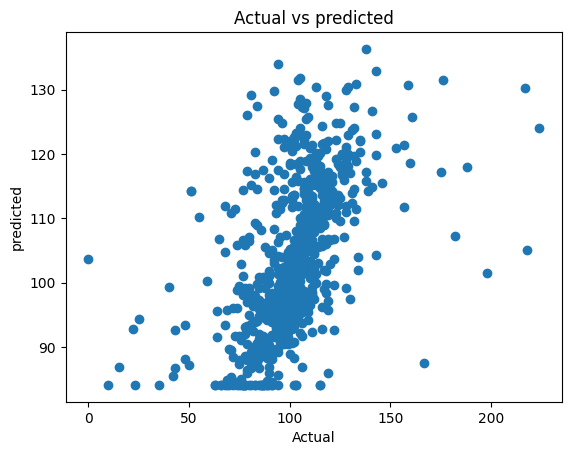

In [84]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [85]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 3ms/step


,Actual,predict,differences
898,87,89.599113,-2.599113
182,65,106.818413,-41.818413
565,103,96.455887,6.544113
457,69,84.820099,-15.820099
1852,104,111.902618,-7.902618
568,78,99.103828,-21.103828
1340,115,117.555077,-2.555077
778,85,89.401421,-4.401421
562,104,97.335869,6.664131
716,95,94.626892,0.373108


## keras tuner with RNN

In [86]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [87]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [88]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [89]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [90]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 8s 67ms/step - loss: 35.7612 - mean_absolute_error: 35.7612 - val_loss: 15.1284 - val_mean_absolute_error: 15.1284
Epoch 2/2000
37/37 [==============================] - 1s 36ms/step - loss: 12.4330 - mean_absolute_error: 12.4330 - val_loss: 12.4009 - val_mean_absolute_error: 12.4009
Epoch 3/2000
37/37 [==============================] - 1s 35ms/step - loss: 11.8119 - mean_absolute_error: 11.8119 - val_loss: 12.0823 - val_mean_absolute_error: 12.0823
Epoch 4/2000
37/37 [==============================] - 1s 36ms/step - loss: 12.1367 - mean_absolute_error: 12.1367 - val_loss: 12.7174 - val_mean_absolute_error: 12.7174
Epoch 5/2000
37/37 [==============================] - 1s 35ms/step - loss: 12.4363 - mean_absolute_error: 12.4363 - val_loss: 12.9550 - val_mean_absolute_error: 12.9550
Epoch 6/2000
37/37 [==============================] - 1s 37ms/step - loss: 11.9594 - mean_absolute_error: 11.9594 - val_loss: 13.3178 - val_mean_absolute_e

37/37 [==============================] - 1s 36ms/step - loss: 11.8143 - mean_absolute_error: 11.8143 - val_loss: 12.0827 - val_mean_absolute_error: 12.0827
Epoch 98/2000
37/37 [==============================] - 1s 36ms/step - loss: 12.0138 - mean_absolute_error: 12.0138 - val_loss: 12.3946 - val_mean_absolute_error: 12.3946
Epoch 99/2000
37/37 [==============================] - 1s 38ms/step - loss: 12.0161 - mean_absolute_error: 12.0161 - val_loss: 12.1417 - val_mean_absolute_error: 12.1417
Epoch 100/2000
37/37 [==============================] - 1s 37ms/step - loss: 11.5252 - mean_absolute_error: 11.5252 - val_loss: 12.4690 - val_mean_absolute_error: 12.4690
Epoch 101/2000
37/37 [==============================] - 1s 36ms/step - loss: 11.5957 - mean_absolute_error: 11.5957 - val_loss: 12.0186 - val_mean_absolute_error: 12.0186
Epoch 102/2000
37/37 [==============================] - 1s 35ms/step - loss: 11.8659 - mean_absolute_error: 11.8659 - val_loss: 12.0639 - val_mean_absolute_error:

37/37 [==============================] - 1s 35ms/step - loss: 11.2412 - mean_absolute_error: 11.2412 - val_loss: 12.0016 - val_mean_absolute_error: 12.0016
Epoch 146/2000
37/37 [==============================] - 1s 34ms/step - loss: 11.2815 - mean_absolute_error: 11.2815 - val_loss: 12.7325 - val_mean_absolute_error: 12.7325
Epoch 147/2000
37/37 [==============================] - 1s 35ms/step - loss: 11.5583 - mean_absolute_error: 11.5583 - val_loss: 12.3222 - val_mean_absolute_error: 12.3222
Epoch 148/2000
37/37 [==============================] - 1s 35ms/step - loss: 11.5052 - mean_absolute_error: 11.5052 - val_loss: 12.5691 - val_mean_absolute_error: 12.5691
Epoch 149/2000
37/37 [==============================] - 1s 38ms/step - loss: 11.2558 - mean_absolute_error: 11.2558 - val_loss: 11.9355 - val_mean_absolute_error: 11.9355
Epoch 150/2000
37/37 [==============================] - 1s 38ms/step - loss: 11.3163 - mean_absolute_error: 11.3163 - val_loss: 12.4850 - val_mean_absolute_erro

Epoch 193/2000
37/37 [==============================] - 1s 36ms/step - loss: 10.6703 - mean_absolute_error: 10.6703 - val_loss: 11.7795 - val_mean_absolute_error: 11.7795
Epoch 194/2000
37/37 [==============================] - 1s 35ms/step - loss: 10.7535 - mean_absolute_error: 10.7535 - val_loss: 11.5278 - val_mean_absolute_error: 11.5278
Epoch 195/2000
37/37 [==============================] - 1s 36ms/step - loss: 10.3790 - mean_absolute_error: 10.3790 - val_loss: 11.5470 - val_mean_absolute_error: 11.5470
Epoch 196/2000
37/37 [==============================] - 1s 36ms/step - loss: 10.6645 - mean_absolute_error: 10.6645 - val_loss: 11.4755 - val_mean_absolute_error: 11.4755
Epoch 197/2000
37/37 [==============================] - 1s 34ms/step - loss: 10.2609 - mean_absolute_error: 10.2609 - val_loss: 12.1673 - val_mean_absolute_error: 12.1673
Epoch 198/2000
37/37 [==============================] - 1s 35ms/step - loss: 10.5685 - mean_absolute_error: 10.5685 - val_loss: 11.7877 - val_mea

Epoch 241/2000
37/37 [==============================] - 1s 36ms/step - loss: 10.1918 - mean_absolute_error: 10.1918 - val_loss: 11.7595 - val_mean_absolute_error: 11.7595
Epoch 242/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.8421 - mean_absolute_error: 9.8421 - val_loss: 11.6901 - val_mean_absolute_error: 11.6901
Epoch 243/2000
37/37 [==============================] - 1s 34ms/step - loss: 9.9528 - mean_absolute_error: 9.9528 - val_loss: 11.4153 - val_mean_absolute_error: 11.4153
Epoch 244/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.9223 - mean_absolute_error: 9.9223 - val_loss: 11.7762 - val_mean_absolute_error: 11.7762
Epoch 245/2000
37/37 [==============================] - 1s 37ms/step - loss: 9.7946 - mean_absolute_error: 9.7946 - val_loss: 11.2492 - val_mean_absolute_error: 11.2492
Epoch 246/2000
37/37 [==============================] - 1s 36ms/step - loss: 10.2012 - mean_absolute_error: 10.2012 - val_loss: 11.7301 - val_mean_absolu

37/37 [==============================] - 1s 35ms/step - loss: 9.6266 - mean_absolute_error: 9.6266 - val_loss: 11.1356 - val_mean_absolute_error: 11.1356
Epoch 338/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.6305 - mean_absolute_error: 9.6305 - val_loss: 11.6426 - val_mean_absolute_error: 11.6426
Epoch 339/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.5792 - mean_absolute_error: 9.5792 - val_loss: 11.9005 - val_mean_absolute_error: 11.9005
Epoch 340/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.7802 - mean_absolute_error: 9.7802 - val_loss: 11.8909 - val_mean_absolute_error: 11.8909
Epoch 341/2000
37/37 [==============================] - 1s 34ms/step - loss: 9.6914 - mean_absolute_error: 9.6914 - val_loss: 11.4672 - val_mean_absolute_error: 11.4672
Epoch 342/2000
37/37 [==============================] - 1s 36ms/step - loss: 9.7496 - mean_absolute_error: 9.7496 - val_loss: 11.4492 - val_mean_absolute_error: 11.4492
E

37/37 [==============================] - 1s 36ms/step - loss: 9.6729 - mean_absolute_error: 9.6729 - val_loss: 11.1211 - val_mean_absolute_error: 11.1211
Epoch 434/2000
37/37 [==============================] - 1s 36ms/step - loss: 9.7979 - mean_absolute_error: 9.7979 - val_loss: 11.2835 - val_mean_absolute_error: 11.2835
Epoch 435/2000
37/37 [==============================] - 1s 37ms/step - loss: 9.4865 - mean_absolute_error: 9.4865 - val_loss: 11.4302 - val_mean_absolute_error: 11.4302
Epoch 436/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.5276 - mean_absolute_error: 9.5276 - val_loss: 11.2619 - val_mean_absolute_error: 11.2619
Epoch 437/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.6690 - mean_absolute_error: 9.6690 - val_loss: 11.3469 - val_mean_absolute_error: 11.3469
Epoch 438/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.7469 - mean_absolute_error: 9.7469 - val_loss: 11.3334 - val_mean_absolute_error: 11.3334
E

37/37 [==============================] - 1s 35ms/step - loss: 9.3260 - mean_absolute_error: 9.3260 - val_loss: 11.4788 - val_mean_absolute_error: 11.4788
Epoch 530/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.3868 - mean_absolute_error: 9.3868 - val_loss: 11.3125 - val_mean_absolute_error: 11.3125
Epoch 531/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.4469 - mean_absolute_error: 9.4469 - val_loss: 11.1739 - val_mean_absolute_error: 11.1739
Epoch 532/2000
37/37 [==============================] - 1s 37ms/step - loss: 9.4494 - mean_absolute_error: 9.4494 - val_loss: 11.1673 - val_mean_absolute_error: 11.1673
Epoch 533/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.4217 - mean_absolute_error: 9.4217 - val_loss: 11.0163 - val_mean_absolute_error: 11.0163
Epoch 534/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.3281 - mean_absolute_error: 9.3281 - val_loss: 10.9019 - val_mean_absolute_error: 10.9019
E

37/37 [==============================] - 1s 39ms/step - loss: 9.5762 - mean_absolute_error: 9.5762 - val_loss: 10.9809 - val_mean_absolute_error: 10.9809
Epoch 626/2000
37/37 [==============================] - 1s 37ms/step - loss: 10.0052 - mean_absolute_error: 10.0052 - val_loss: 11.1444 - val_mean_absolute_error: 11.1444
Epoch 627/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.7071 - mean_absolute_error: 9.7071 - val_loss: 11.1188 - val_mean_absolute_error: 11.1188
Epoch 628/2000
37/37 [==============================] - 1s 36ms/step - loss: 9.9574 - mean_absolute_error: 9.9574 - val_loss: 11.0414 - val_mean_absolute_error: 11.0414
Epoch 629/2000
37/37 [==============================] - 1s 37ms/step - loss: 9.6591 - mean_absolute_error: 9.6591 - val_loss: 11.0906 - val_mean_absolute_error: 11.0906
Epoch 630/2000
37/37 [==============================] - 1s 37ms/step - loss: 9.5919 - mean_absolute_error: 9.5919 - val_loss: 11.4998 - val_mean_absolute_error: 11.4998

37/37 [==============================] - 1s 23ms/step - loss: 9.4862 - mean_absolute_error: 9.4862 - val_loss: 10.9707 - val_mean_absolute_error: 10.9707
Epoch 722/2000
37/37 [==============================] - 1s 23ms/step - loss: 9.3228 - mean_absolute_error: 9.3228 - val_loss: 10.9954 - val_mean_absolute_error: 10.9954
Epoch 723/2000
37/37 [==============================] - 1s 25ms/step - loss: 9.3596 - mean_absolute_error: 9.3596 - val_loss: 10.9437 - val_mean_absolute_error: 10.9437
Epoch 724/2000
37/37 [==============================] - 1s 24ms/step - loss: 9.4402 - mean_absolute_error: 9.4402 - val_loss: 12.0390 - val_mean_absolute_error: 12.0390
Epoch 725/2000
37/37 [==============================] - 1s 24ms/step - loss: 9.6192 - mean_absolute_error: 9.6192 - val_loss: 10.9816 - val_mean_absolute_error: 10.9816
Epoch 726/2000
37/37 [==============================] - 1s 23ms/step - loss: 9.5565 - mean_absolute_error: 9.5565 - val_loss: 11.4504 - val_mean_absolute_error: 11.4504
E

37/37 [==============================] - 1s 23ms/step - loss: 9.5248 - mean_absolute_error: 9.5248 - val_loss: 10.9833 - val_mean_absolute_error: 10.9833
Epoch 818/2000
37/37 [==============================] - 1s 24ms/step - loss: 9.2586 - mean_absolute_error: 9.2586 - val_loss: 10.8171 - val_mean_absolute_error: 10.8171
Epoch 819/2000
37/37 [==============================] - 1s 24ms/step - loss: 9.3509 - mean_absolute_error: 9.3509 - val_loss: 10.9429 - val_mean_absolute_error: 10.9429
Epoch 820/2000
37/37 [==============================] - 1s 23ms/step - loss: 9.2972 - mean_absolute_error: 9.2972 - val_loss: 11.2599 - val_mean_absolute_error: 11.2599
Epoch 821/2000
37/37 [==============================] - 1s 22ms/step - loss: 9.4159 - mean_absolute_error: 9.4159 - val_loss: 11.6196 - val_mean_absolute_error: 11.6196
Epoch 822/2000
37/37 [==============================] - 1s 23ms/step - loss: 9.4760 - mean_absolute_error: 9.4760 - val_loss: 11.6812 - val_mean_absolute_error: 11.6812
E

37/37 [==============================] - 1s 30ms/step - loss: 9.4598 - mean_absolute_error: 9.4598 - val_loss: 11.1050 - val_mean_absolute_error: 11.1050
Epoch 914/2000
37/37 [==============================] - 1s 25ms/step - loss: 9.4002 - mean_absolute_error: 9.4002 - val_loss: 11.1993 - val_mean_absolute_error: 11.1993
Epoch 915/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.3431 - mean_absolute_error: 9.3431 - val_loss: 10.7852 - val_mean_absolute_error: 10.7852
Epoch 916/2000
37/37 [==============================] - 1s 24ms/step - loss: 9.1702 - mean_absolute_error: 9.1702 - val_loss: 11.0815 - val_mean_absolute_error: 11.0815
Epoch 917/2000
37/37 [==============================] - 1s 24ms/step - loss: 9.3178 - mean_absolute_error: 9.3178 - val_loss: 10.9045 - val_mean_absolute_error: 10.9045
Epoch 918/2000
37/37 [==============================] - 1s 25ms/step - loss: 9.1071 - mean_absolute_error: 9.1071 - val_loss: 11.0309 - val_mean_absolute_error: 11.0309
E

37/37 [==============================] - 1s 26ms/step - loss: 9.3085 - mean_absolute_error: 9.3085 - val_loss: 11.2882 - val_mean_absolute_error: 11.2882
Epoch 1010/2000
37/37 [==============================] - 1s 26ms/step - loss: 9.2734 - mean_absolute_error: 9.2734 - val_loss: 10.9673 - val_mean_absolute_error: 10.9673
Epoch 1011/2000
37/37 [==============================] - 1s 26ms/step - loss: 9.0843 - mean_absolute_error: 9.0843 - val_loss: 10.8705 - val_mean_absolute_error: 10.8705
Epoch 1012/2000
37/37 [==============================] - 1s 26ms/step - loss: 9.3327 - mean_absolute_error: 9.3327 - val_loss: 11.2355 - val_mean_absolute_error: 11.2355
Epoch 1013/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.1264 - mean_absolute_error: 9.1264 - val_loss: 10.8318 - val_mean_absolute_error: 10.8318
Epoch 1014/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.2240 - mean_absolute_error: 9.2240 - val_loss: 10.9463 - val_mean_absolute_error: 10.9

37/37 [==============================] - 1s 27ms/step - loss: 9.3550 - mean_absolute_error: 9.3550 - val_loss: 11.1036 - val_mean_absolute_error: 11.1036
Epoch 1106/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.2186 - mean_absolute_error: 9.2186 - val_loss: 11.2064 - val_mean_absolute_error: 11.2064
Epoch 1107/2000
37/37 [==============================] - 1s 26ms/step - loss: 9.1739 - mean_absolute_error: 9.1739 - val_loss: 10.9698 - val_mean_absolute_error: 10.9698
Epoch 1108/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.0901 - mean_absolute_error: 9.0901 - val_loss: 11.0361 - val_mean_absolute_error: 11.0361
Epoch 1109/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.0433 - mean_absolute_error: 9.0433 - val_loss: 11.0245 - val_mean_absolute_error: 11.0245
Epoch 1110/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.1521 - mean_absolute_error: 9.1521 - val_loss: 11.1684 - val_mean_absolute_error: 11.1

37/37 [==============================] - 1s 27ms/step - loss: 9.1066 - mean_absolute_error: 9.1066 - val_loss: 12.5590 - val_mean_absolute_error: 12.5590
Epoch 1202/2000
37/37 [==============================] - 1s 26ms/step - loss: 9.5511 - mean_absolute_error: 9.5511 - val_loss: 10.9890 - val_mean_absolute_error: 10.9890
Epoch 1203/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.0195 - mean_absolute_error: 9.0195 - val_loss: 11.3721 - val_mean_absolute_error: 11.3721
Epoch 1204/2000
37/37 [==============================] - 1s 25ms/step - loss: 9.2906 - mean_absolute_error: 9.2906 - val_loss: 11.3114 - val_mean_absolute_error: 11.3114
Epoch 1205/2000
37/37 [==============================] - 1s 27ms/step - loss: 9.1446 - mean_absolute_error: 9.1446 - val_loss: 10.9348 - val_mean_absolute_error: 10.9348
Epoch 1206/2000
37/37 [==============================] - 1s 26ms/step - loss: 8.9629 - mean_absolute_error: 8.9629 - val_loss: 11.0130 - val_mean_absolute_error: 11.0

37/37 [==============================] - 1s 31ms/step - loss: 9.1724 - mean_absolute_error: 9.1724 - val_loss: 10.8597 - val_mean_absolute_error: 10.8597
Epoch 1298/2000
37/37 [==============================] - 1s 33ms/step - loss: 9.0296 - mean_absolute_error: 9.0296 - val_loss: 10.9219 - val_mean_absolute_error: 10.9219
Epoch 1299/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.2297 - mean_absolute_error: 9.2297 - val_loss: 11.5248 - val_mean_absolute_error: 11.5248
Epoch 1300/2000
37/37 [==============================] - 1s 31ms/step - loss: 8.8291 - mean_absolute_error: 8.8291 - val_loss: 11.3646 - val_mean_absolute_error: 11.3646
Epoch 1301/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.2427 - mean_absolute_error: 9.2427 - val_loss: 10.6304 - val_mean_absolute_error: 10.6304
Epoch 1302/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.1507 - mean_absolute_error: 9.1507 - val_loss: 10.7678 - val_mean_absolute_error: 10.7

37/37 [==============================] - 1s 31ms/step - loss: 9.0228 - mean_absolute_error: 9.0228 - val_loss: 10.6574 - val_mean_absolute_error: 10.6574
Epoch 1394/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.1400 - mean_absolute_error: 9.1400 - val_loss: 11.0216 - val_mean_absolute_error: 11.0216
Epoch 1395/2000
37/37 [==============================] - 1s 29ms/step - loss: 9.0159 - mean_absolute_error: 9.0159 - val_loss: 10.9583 - val_mean_absolute_error: 10.9583
Epoch 1396/2000
37/37 [==============================] - 1s 33ms/step - loss: 9.1303 - mean_absolute_error: 9.1303 - val_loss: 10.8254 - val_mean_absolute_error: 10.8254
Epoch 1397/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0779 - mean_absolute_error: 9.0779 - val_loss: 11.0915 - val_mean_absolute_error: 11.0915
Epoch 1398/2000
37/37 [==============================] - 1s 32ms/step - loss: 9.0205 - mean_absolute_error: 9.0205 - val_loss: 11.0098 - val_mean_absolute_error: 11.0

37/37 [==============================] - 1s 32ms/step - loss: 9.0928 - mean_absolute_error: 9.0928 - val_loss: 10.7796 - val_mean_absolute_error: 10.7796
Epoch 1490/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.1380 - mean_absolute_error: 9.1380 - val_loss: 10.6089 - val_mean_absolute_error: 10.6089
Epoch 1491/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0955 - mean_absolute_error: 9.0955 - val_loss: 10.7929 - val_mean_absolute_error: 10.7929
Epoch 1492/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.1130 - mean_absolute_error: 9.1130 - val_loss: 10.6419 - val_mean_absolute_error: 10.6419
Epoch 1493/2000
37/37 [==============================] - 1s 30ms/step - loss: 8.7951 - mean_absolute_error: 8.7951 - val_loss: 10.8106 - val_mean_absolute_error: 10.8106
Epoch 1494/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.0604 - mean_absolute_error: 9.0604 - val_loss: 10.9733 - val_mean_absolute_error: 10.9

37/37 [==============================] - 1s 31ms/step - loss: 9.3701 - mean_absolute_error: 9.3701 - val_loss: 10.6443 - val_mean_absolute_error: 10.6443
Epoch 1586/2000
37/37 [==============================] - 1s 32ms/step - loss: 9.1581 - mean_absolute_error: 9.1581 - val_loss: 10.6791 - val_mean_absolute_error: 10.6791
Epoch 1587/2000
37/37 [==============================] - 1s 35ms/step - loss: 9.2960 - mean_absolute_error: 9.2960 - val_loss: 10.8737 - val_mean_absolute_error: 10.8737
Epoch 1588/2000
37/37 [==============================] - 1s 38ms/step - loss: 9.4801 - mean_absolute_error: 9.4801 - val_loss: 11.2698 - val_mean_absolute_error: 11.2698
Epoch 1589/2000
37/37 [==============================] - 1s 37ms/step - loss: 9.0946 - mean_absolute_error: 9.0946 - val_loss: 10.8513 - val_mean_absolute_error: 10.8513
Epoch 1590/2000
37/37 [==============================] - 1s 34ms/step - loss: 9.2192 - mean_absolute_error: 9.2192 - val_loss: 11.1509 - val_mean_absolute_error: 11.1

37/37 [==============================] - 1s 30ms/step - loss: 8.8701 - mean_absolute_error: 8.8701 - val_loss: 11.3348 - val_mean_absolute_error: 11.3348
Epoch 1682/2000
37/37 [==============================] - 1s 29ms/step - loss: 8.8385 - mean_absolute_error: 8.8385 - val_loss: 10.8582 - val_mean_absolute_error: 10.8582
Epoch 1683/2000
37/37 [==============================] - 1s 29ms/step - loss: 8.8040 - mean_absolute_error: 8.8040 - val_loss: 11.2142 - val_mean_absolute_error: 11.2142
Epoch 1684/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0540 - mean_absolute_error: 9.0540 - val_loss: 10.8433 - val_mean_absolute_error: 10.8433
Epoch 1685/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.1427 - mean_absolute_error: 9.1427 - val_loss: 10.9224 - val_mean_absolute_error: 10.9224
Epoch 1686/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.1100 - mean_absolute_error: 9.1100 - val_loss: 11.2957 - val_mean_absolute_error: 11.2

37/37 [==============================] - 1s 29ms/step - loss: 8.9831 - mean_absolute_error: 8.9831 - val_loss: 10.9773 - val_mean_absolute_error: 10.9773
Epoch 1778/2000
37/37 [==============================] - 1s 30ms/step - loss: 8.7025 - mean_absolute_error: 8.7025 - val_loss: 11.3235 - val_mean_absolute_error: 11.3235
Epoch 1779/2000
37/37 [==============================] - 1s 30ms/step - loss: 8.7918 - mean_absolute_error: 8.7918 - val_loss: 11.2639 - val_mean_absolute_error: 11.2639
Epoch 1780/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0520 - mean_absolute_error: 9.0520 - val_loss: 11.6124 - val_mean_absolute_error: 11.6124
Epoch 1781/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.0290 - mean_absolute_error: 9.0290 - val_loss: 10.9117 - val_mean_absolute_error: 10.9117
Epoch 1782/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.0004 - mean_absolute_error: 9.0004 - val_loss: 10.9860 - val_mean_absolute_error: 10.9

37/37 [==============================] - 1s 30ms/step - loss: 9.2500 - mean_absolute_error: 9.2500 - val_loss: 10.9201 - val_mean_absolute_error: 10.9201
Epoch 1874/2000
37/37 [==============================] - 1s 32ms/step - loss: 9.0657 - mean_absolute_error: 9.0657 - val_loss: 10.7636 - val_mean_absolute_error: 10.7636
Epoch 1875/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0573 - mean_absolute_error: 9.0573 - val_loss: 11.2409 - val_mean_absolute_error: 11.2409
Epoch 1876/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.1381 - mean_absolute_error: 9.1381 - val_loss: 10.5308 - val_mean_absolute_error: 10.5308
Epoch 1877/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0084 - mean_absolute_error: 9.0084 - val_loss: 10.5007 - val_mean_absolute_error: 10.5007
Epoch 1878/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.3824 - mean_absolute_error: 9.3824 - val_loss: 10.8968 - val_mean_absolute_error: 10.8

37/37 [==============================] - 1s 30ms/step - loss: 9.1880 - mean_absolute_error: 9.1880 - val_loss: 10.4626 - val_mean_absolute_error: 10.4626
Epoch 1970/2000
37/37 [==============================] - 1s 31ms/step - loss: 9.0906 - mean_absolute_error: 9.0906 - val_loss: 10.6162 - val_mean_absolute_error: 10.6162
Epoch 1971/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0853 - mean_absolute_error: 9.0853 - val_loss: 10.5494 - val_mean_absolute_error: 10.5494
Epoch 1972/2000
37/37 [==============================] - 1s 30ms/step - loss: 9.0301 - mean_absolute_error: 9.0301 - val_loss: 10.5742 - val_mean_absolute_error: 10.5742
Epoch 1973/2000
37/37 [==============================] - 1s 32ms/step - loss: 9.0794 - mean_absolute_error: 9.0794 - val_loss: 10.6867 - val_mean_absolute_error: 10.6867
Epoch 1974/2000
37/37 [==============================] - 1s 30ms/step - loss: 8.9432 - mean_absolute_error: 8.9432 - val_loss: 10.7926 - val_mean_absolute_error: 10.7

In [91]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

23/23 [==============================] - 1s 10ms/step


0.36844393407720877

In [92]:
prediction =np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 900ms/step
Prediction: 109.86114501953125


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 10ms/step
mean squired error: 307.9712610924049
mean absolute error: 10.528128298056894


23/23 [==============================] - 0s 11ms/step


Text(0.5, 1.0, 'Actual vs predicted')

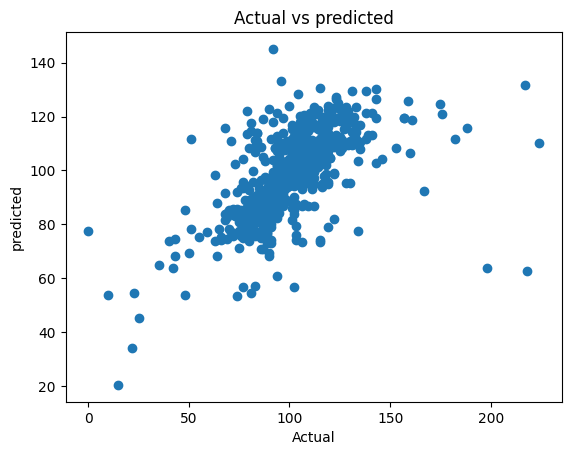

In [94]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [95]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 12ms/step


,Actual,predict,differences
898,87,90.996071,-3.996071
182,65,78.167397,-13.167397
565,103,100.629997,2.370003
457,69,74.734589,-5.734589
1852,104,108.230659,-4.230659
568,78,83.830460,-5.830460
1340,115,130.570923,-15.570923
778,85,82.296364,2.703636
562,104,101.295227,2.704773
716,95,86.622810,8.377190
